# NETLIX_DATASET

Importing pandas

In [1]:
import pandas as pd
import numpy as np

Show pandas.DataFrame

In [2]:
netflix_titl =  pd.read_csv('netflix_titles.csv')
netflix_titl.head()

show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   
3  80058654  TV Show         Transformers: Robots in Disguise   
4  80125979    Movie                             #realityhigh   

                   director  \
0  Richard Finn, Tim Maltby   
1                       NaN   
2                       NaN   
3                       NaN   
4          Fernando Lebrija   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
2  Peter Cullen, Sumalee Montano, Frank Welker, J...   
3  Will Friedle, Darren Criss, Constance Zimmer, ...   
4  Nesta Cooper, Kate Walsh, John Michael Higgins...   

                                    country         date_added  release_year  \
0  United States, India, South Korea, China  September 9, 2019          2019   
1                            United Kingdom  September 9, 2016          2016   
2                             United States  September 8, 2018          2013   
3                             United States  September 8, 2018          2016   
4                             United States  September 8, 2017          2017   

     rating  duration                           listed_in  \
0     TV-PG    90 min  Children & Family Movies, Comedies   
1     TV-MA    94 min                     Stand-Up Comedy   
2  TV-Y7-FV  1 Season                            Kids' TV   
3     TV-Y7  1 Season                            Kids' TV   
4     TV-14    99 min                            Comedies   

                                         description  
0  Before planning an awesome wedding for his gra...  
1  Jandino Asporaat riffs on the challenges of ra...  
2  With the help of three human allies, the Autob...  
3  When a prison ship crash unleashes hundreds of...  
4  When nerdy high schooler Dani finally attracts...

# Exploratory Dataset

In [3]:
# Dimensional of dataset
netflix_titl.shape

(6234, 12)

In [4]:
netflix_titl.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

Summary 

In [5]:
netflix_titl.describe(include='all')

show_id   type title                director                cast  \
count   6.234000e+03   6234  6234                    4265                5664   
unique           NaN      2  6172                    3301                5469   
top              NaN  Movie  Love  Raúl Campos, Jan Suter  David Attenborough   
freq             NaN   4265     3                      18                  18   
mean    7.670368e+07    NaN   NaN                     NaN                 NaN   
std     1.094296e+07    NaN   NaN                     NaN                 NaN   
min     2.477470e+05    NaN   NaN                     NaN                 NaN   
25%     8.003580e+07    NaN   NaN                     NaN                 NaN   
50%     8.016337e+07    NaN   NaN                     NaN                 NaN   
75%     8.024489e+07    NaN   NaN                     NaN                 NaN   
max     8.123573e+07    NaN   NaN                     NaN                 NaN   

              country       date_added  release_year rating  duration  \
count            5758             6223    6234.00000   6224      6234   
unique            554             1524           NaN     14       201   
top     United States  January 1, 2020           NaN  TV-MA  1 Season   
freq             2032              122           NaN   2027      1321   
mean              NaN              NaN    2013.35932    NaN       NaN   
std               NaN              NaN       8.81162    NaN       NaN   
min               NaN              NaN    1925.00000    NaN       NaN   
25%               NaN              NaN    2013.00000    NaN       NaN   
50%               NaN              NaN    2016.00000    NaN       NaN   
75%               NaN              NaN    2018.00000    NaN       NaN   
max               NaN              NaN    2020.00000    NaN       NaN   

            listed_in                                        description  
count            6234                                               6234  
unique            461                                               6226  
top     Documentaries  A surly septuagenarian gets another chance at ...  
freq              299                                                  3  
mean              NaN                                                NaN  
std               NaN                                                NaN  
min               NaN                                                NaN  
25%               NaN                                                NaN  
50%               NaN                                                NaN  
75%               NaN                                                NaN  
max               NaN                                                NaN

Main poin

    - show_id and description has the same number
    - there's some missing value

Using percentage to show missing values

In [6]:
for i in netflix_titl.columns:
    null_rate = netflix_titl[i].isna().sum() / len (netflix_titl) * 100 
    if null_rate > 0 :
        print(f"{i}'s null rate : {null_rate} %")

director's null rate : 31.584857234520374 %
cast's null rate : 9.143407122232915 %
country's null rate : 7.635547000320821 %
date_added's null rate : 0.17645171639396856 %
rating's null rate : 0.16041065126724416 %


Visualize missing values (NaN) values using Missingno Library

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno #

import warnings
warnings.filterwarnings("ignore")

In [8]:
plt.rc('font', size=12) #controls default text sizes
plt.rc('axes', titlesize=14) #fontsize of the axes title
plt.rc('axes', labelsize=12) #fontsize of the x and y labels
plt.rc('xtick', labelsize=12) #fontsize of the tick labels
plt.rc('ytick', labelsize=12) #fontsize of the tick labels
plt.rc('legend', fontsize=12) #legend fontsize
plt.rc('figure', titlesize=14) #fontsize of the figure title
plt.rcParams['figure.dpi'] = 300
sns.set_style('whitegrid')

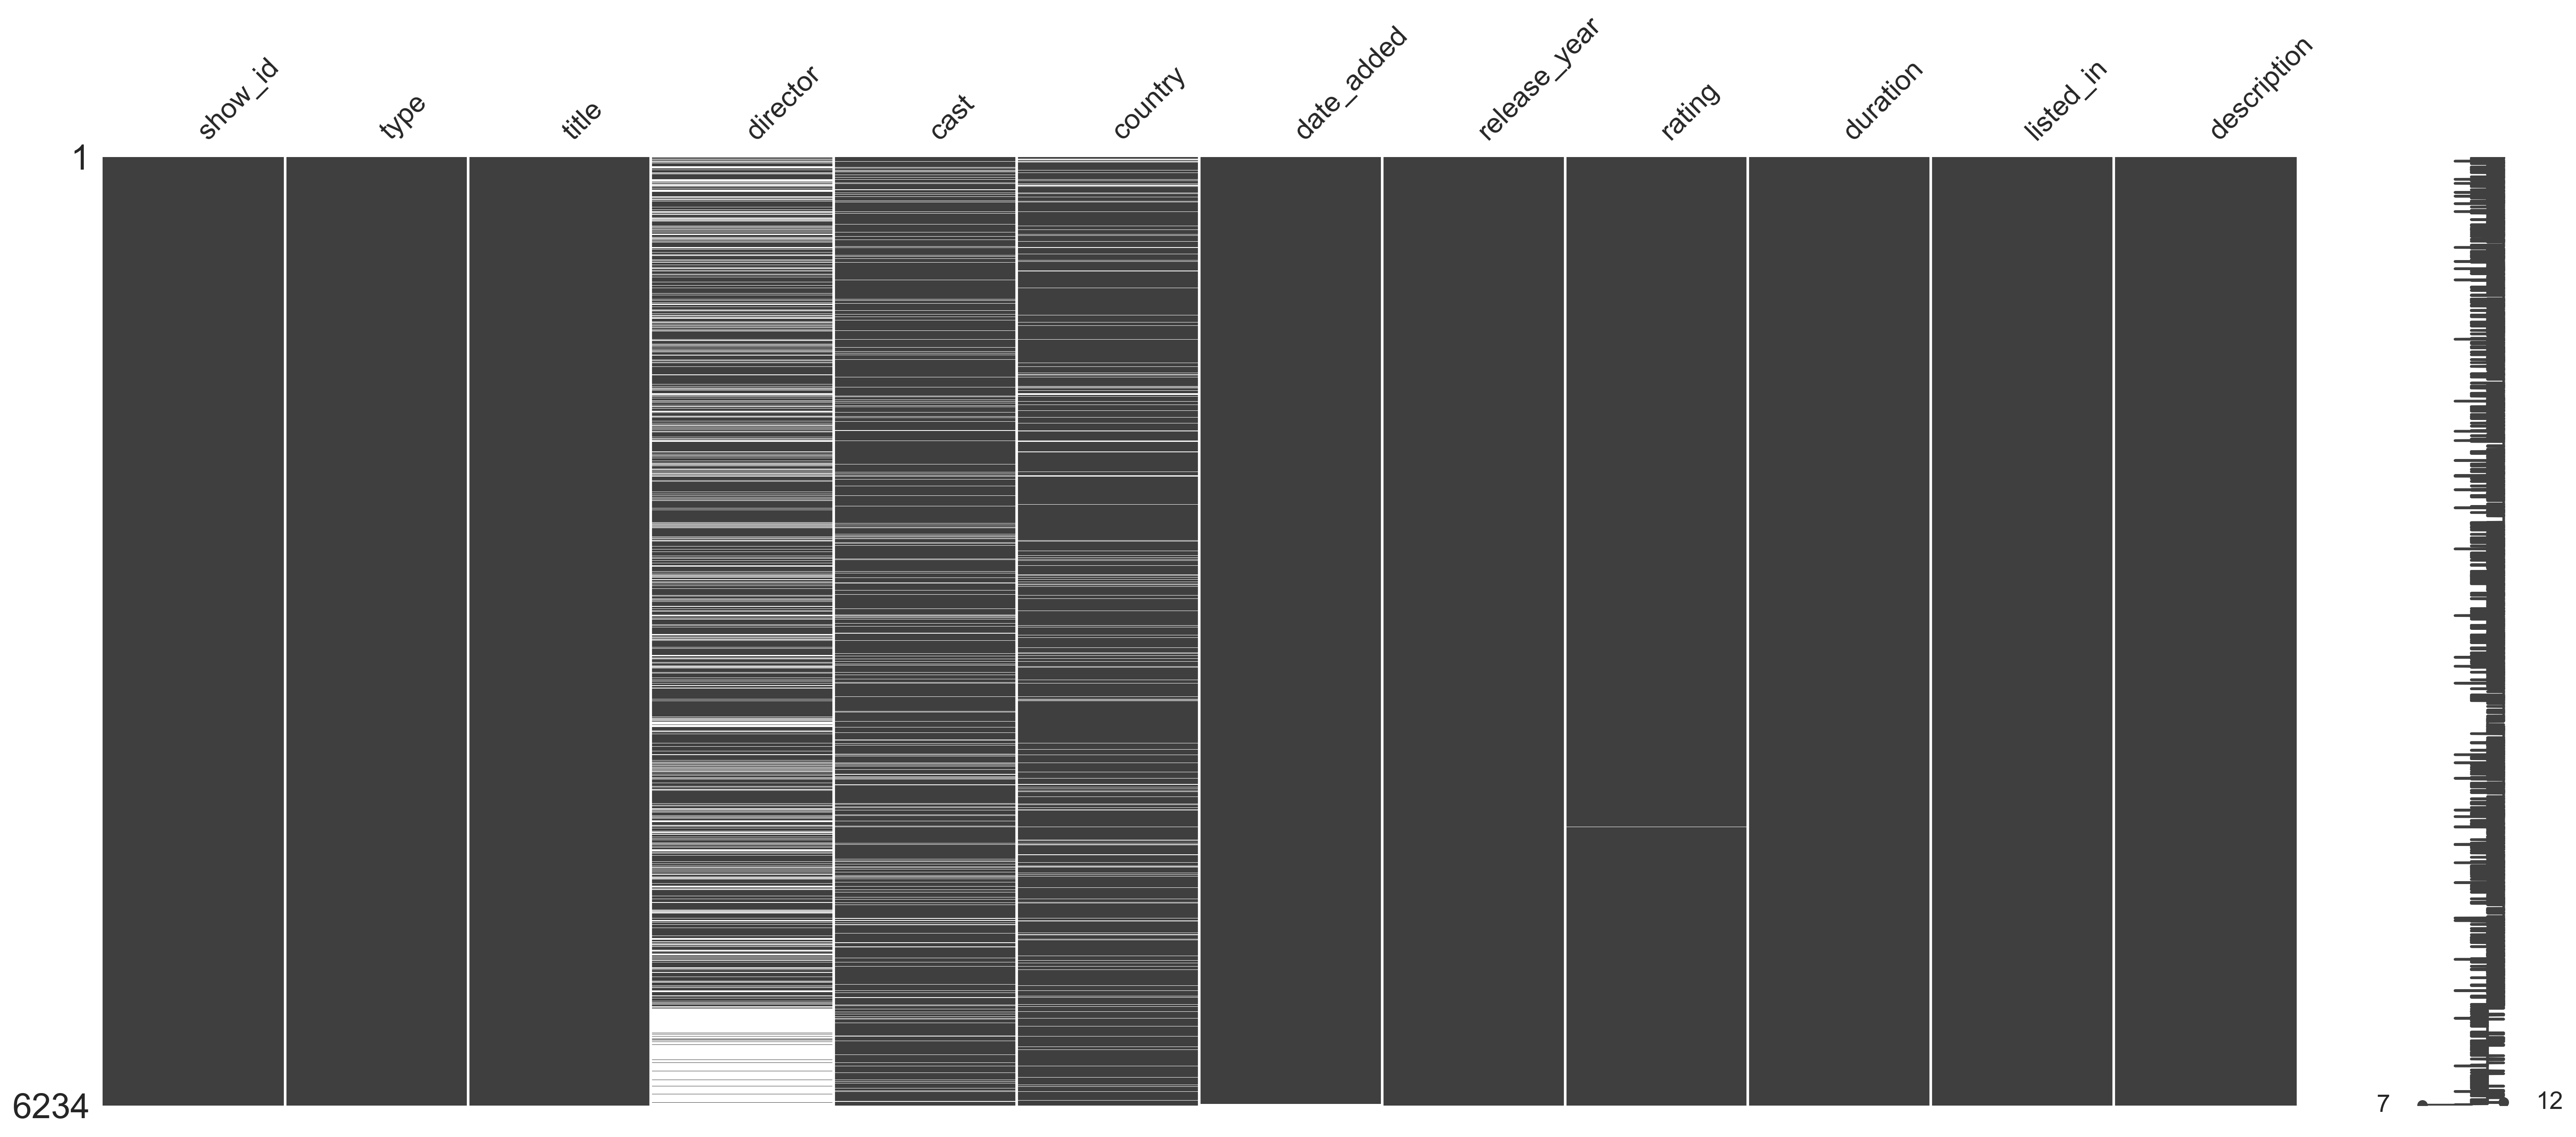

In [9]:
msno.matrix(netflix_titl)
plt.show()

From visualitation we can Exploratory Data Analyst with show_id the elements of the movie except for description

In [10]:
#Missing value for year and date
netflix_titl = netflix_titl.fillna('NULL')
netflix_titl['year_added'] = netflix_titl['date_added'].apply(lambda x :  x.split(',')[-1])
netflix_titl['year_added'] = netflix_titl['year_added'].apply(lambda x : x if x != 'NULL' else '2020')
netflix_titl['year_added'] = netflix_titl['year_added'].apply(int)

Data Type

In [11]:
netflix_titl.type

0         Movie
1         Movie
2       TV Show
3       TV Show
4         Movie
         ...   
6229    TV Show
6230    TV Show
6231      Movie
6232    TV Show
6233    TV Show
Name: type, Length: 6234, dtype: object

Categories data like "Movie" and "TV Show"

In [12]:
Movie = netflix_titl[netflix_titl['type'] == 'Movie']
Movie.type

0       Movie
1       Movie
4       Movie
6       Movie
7       Movie
        ...  
5577    Movie
5578    Movie
5579    Movie
5580    Movie
6231    Movie
Name: type, Length: 4265, dtype: object

In [13]:
TV_Show = netflix_titl[netflix_titl['type'] == 'TV Show']
TV_Show.type.head()

2     TV Show
3     TV Show
5     TV Show
8     TV Show
26    TV Show
Name: type, dtype: object

# Visualization Exploratory Data Analyst

Defining paths that objects follow on a canvas with path effects from matplotlib

In [14]:
import matplotlib.patheffects as path_effects

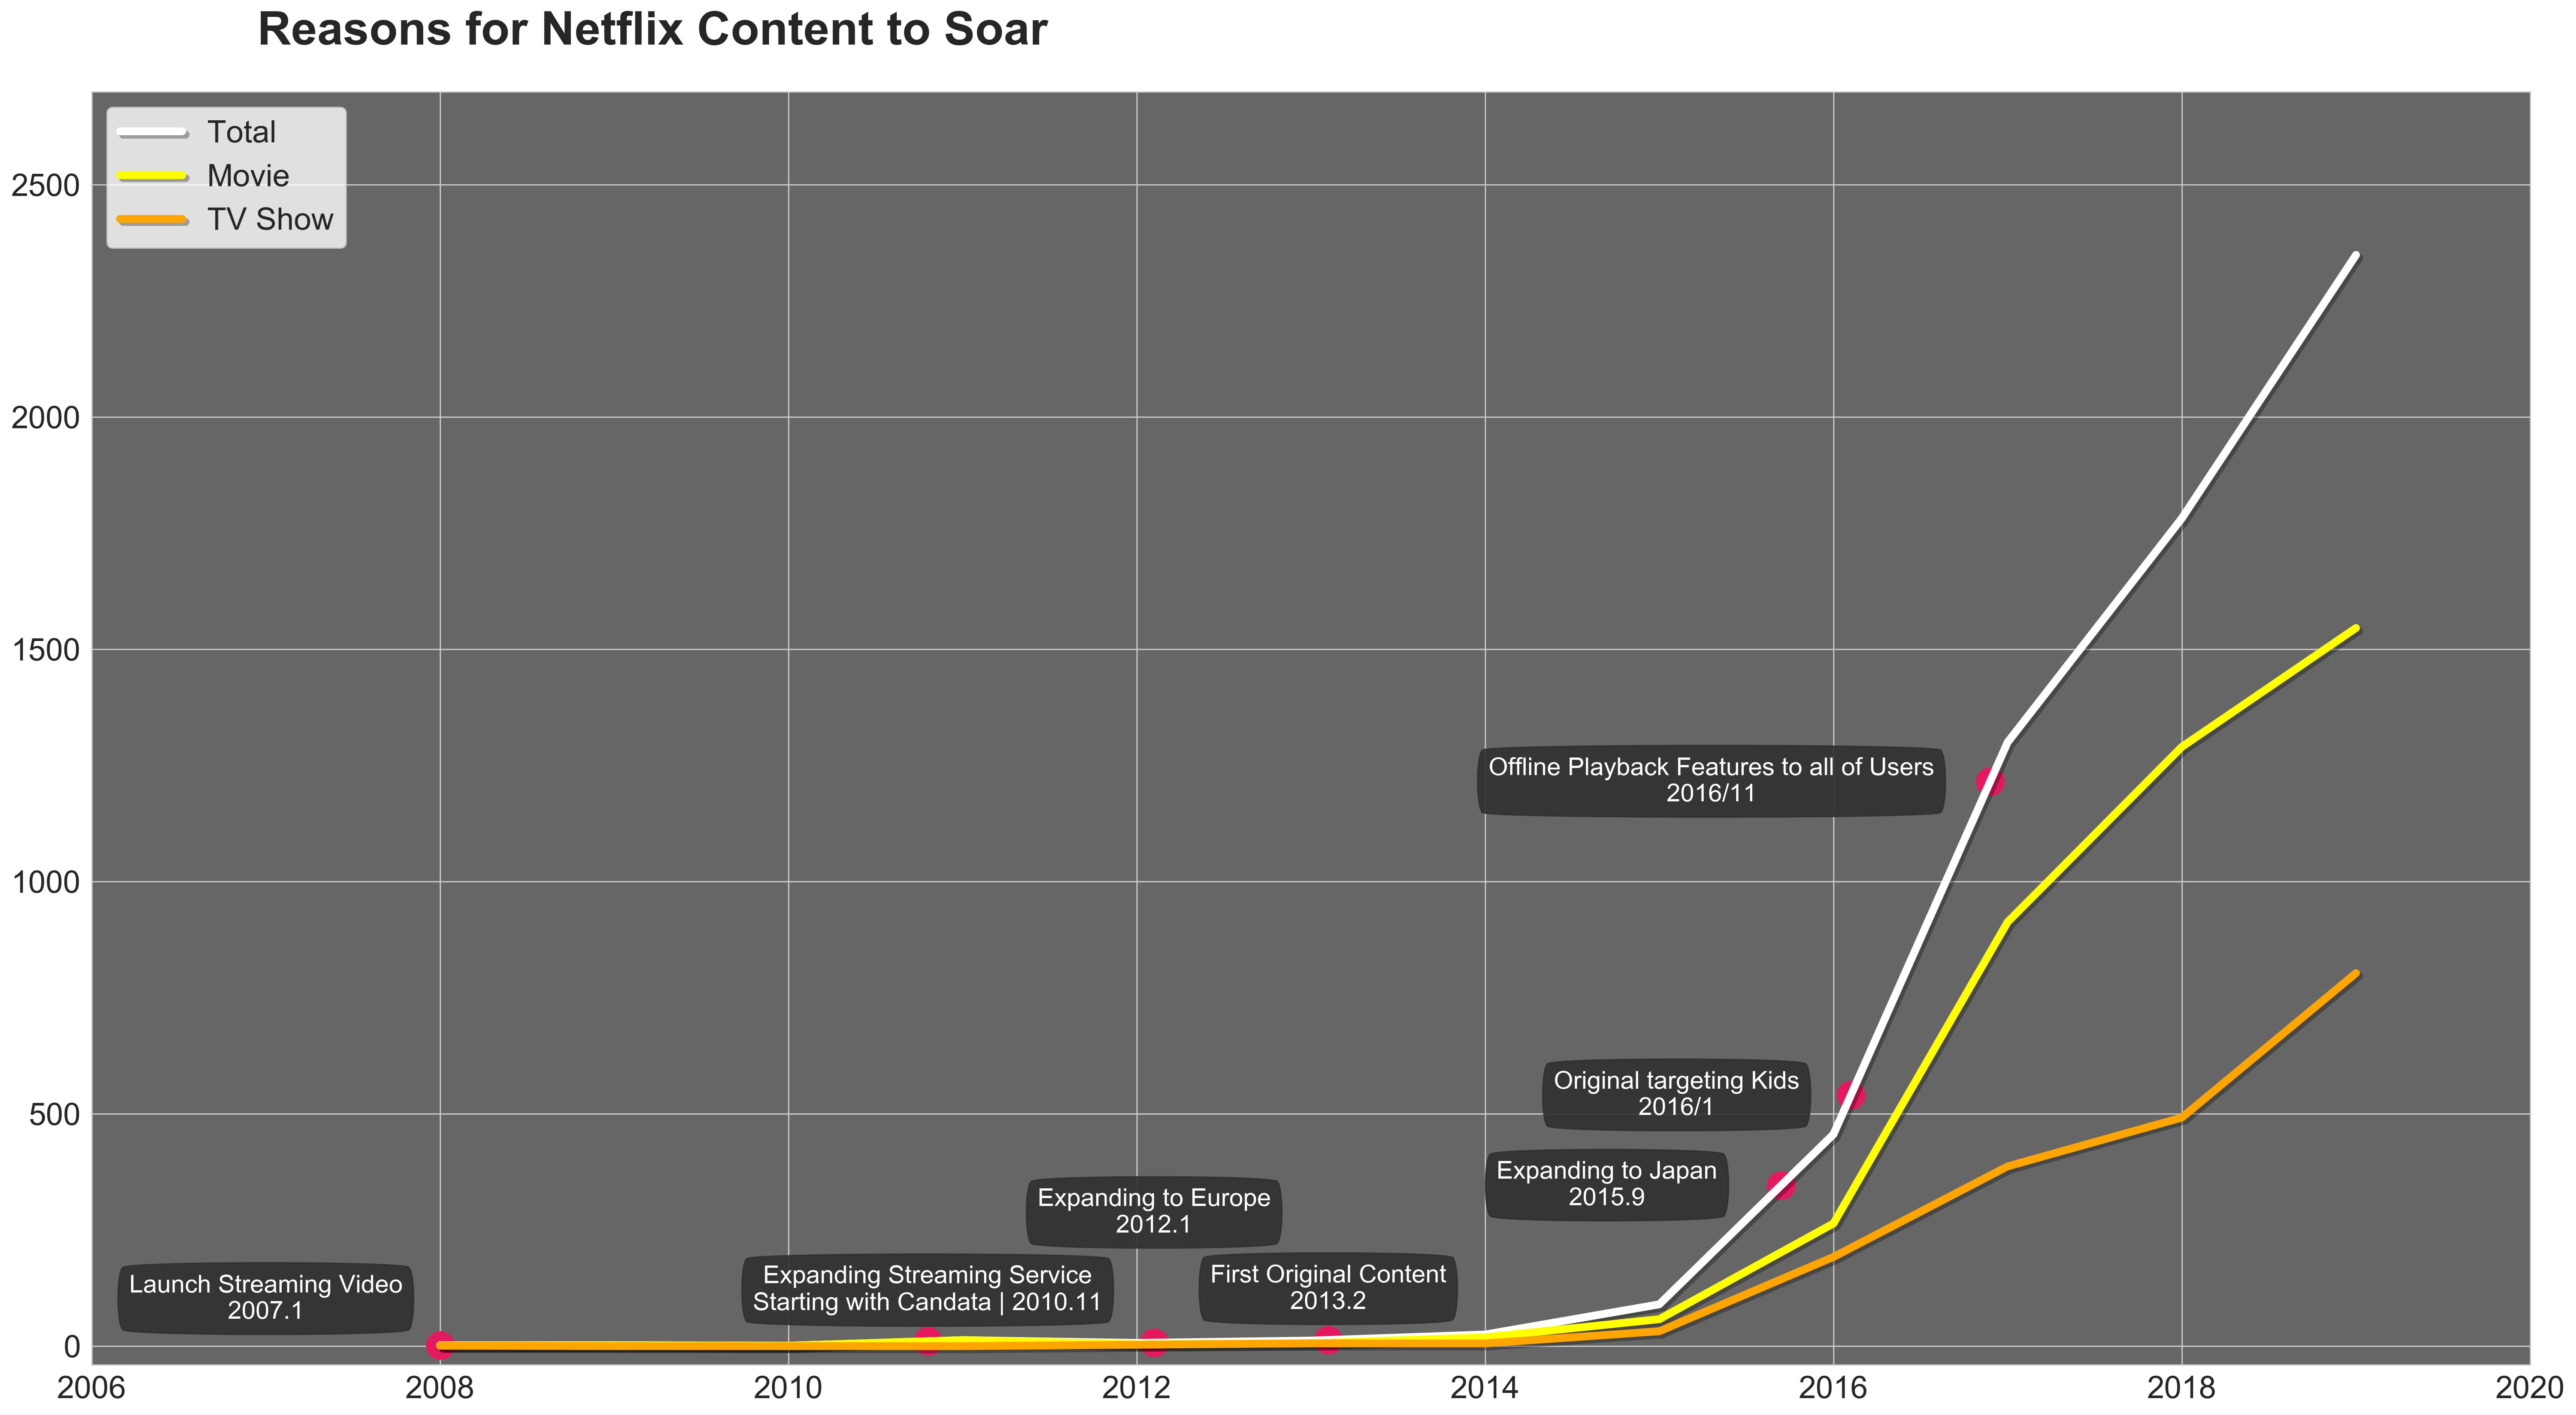

In [15]:
data_year = netflix_titl['year_added'].value_counts().sort_index().loc[:2019]
data_type = netflix_titl.groupby('type')['year_added'].value_counts().sort_index().unstack().fillna(0).T.loc[:2019] 

fig, ax = plt.subplots(1,1, figsize=(28, 15))
ax.plot(data_year.index, data_year,  color="white", linewidth=5, label='Total', path_effects=[path_effects.SimpleLineShadow(),
                       path_effects.Normal()])
ax.plot(data_type.index, data_type['Movie'], color='yellow', linewidth=5, label='Movie', path_effects=[path_effects.SimpleLineShadow(),
                       path_effects.Normal()])
ax.plot(data_type.index, data_type['TV Show'], color='orange', linewidth=5, label='TV Show', path_effects=[path_effects.SimpleLineShadow(),
                       path_effects.Normal()])

ax.set_xlim(2006, 2020)
ax.set_ylim(-40, 2700)

t = [
    2008,
    2010.8,
    2012.1,
    2013.1,
    2015.7,
    2016.1,
    2016.9
]

events = [
    "Launch Streaming Video\n2007.1",
    "Expanding Streaming Service\nStarting with Candata | 2010.11",
    "Expanding to Europe\n2012.1",
    "First Original Content\n2013.2",
    "Expanding to Japan\n2015.9",
    "Original targeting Kids\n2016/1",
    "Offline Playback Features to all of Users\n2016/11"
]

up_down = [ 
    100,
    110,
    280,
    110,
    0,
    0,
    0
]

left_right = [
    -1,
    -0,
    -0,
    -0,
    -1,
    -1,
    -1.6,
    
]

for t_i, event_i, ud_i, lr_i in zip(t, events, up_down, left_right):
    ax.annotate(event_i,
                xy=(t_i + lr_i, data_year[int(t_i)] * (int(t_i+1)-t_i) + data_year[int(t_i)+1]  * (t_i-int(t_i)) + ud_i),
                xytext=(0,0), textcoords='offset points',
                va="center", ha="center",
                color="w", fontsize=16,
                bbox=dict(boxstyle='round4', pad=0.5, color='#303030', alpha=0.90))
    
    # A proportional expression to draw the middle of the year
    ax.scatter(t_i, data_year[int(t_i)] * (int(t_i+1)-t_i) + data_year[int(t_i)+1]  * (t_i-int(t_i)), color='#E51960', s=300)

ax.set_facecolor((0.4, 0.4, 0.4))
ax.set_title("Reasons for Netflix Content to Soar", position=(0.23, 1.0+0.03), fontsize=30, fontweight='bold')
ax.yaxis.set_tick_params(labelsize=20)
ax.xaxis.set_tick_params(labelsize=20)
plt.legend(loc='upper left', fontsize=20)

plt.show()

It can be seen that this growth is only by looking at the data_add content.

Every time they expand overseas, they have added country content to Netflix and can assume that the content continues to be produced with positive feedback. 

## Comparison by Country

Preprocess the data inside the country columns.

In [16]:
# dict subclass for counting hashable objects 
from collections import Counter
data_country = netflix_titl['country']
country_counting = pd.Series(dict(Counter(','.join(data_country).replace(' ,',',').replace(', ',',').split(',')))).sort_values(ascending=False)
country_counting.drop(['NULL'], axis=0, inplace=True)

Using the **[Pareto principle(80/20 rule)](https://en.wikipedia.org/wiki/Pareto_principle) for count on the other side for a moment

In [17]:
tot = sum(country_counting)
top20 = sum(country_counting[:20]) # 22 is real 20% but for simple processing

print(f'total : {tot}')
print(f'top 20 countries : {top20}')
print(f'percentage : {top20}/{tot} = {100 * top20/tot}')

total : 7182
top 20 countries : 6318
percentage : 6318/7182 = 87.96992481203007


## Bar Plot & Pie Plot

In [18]:
top20_country = country_counting[:20]

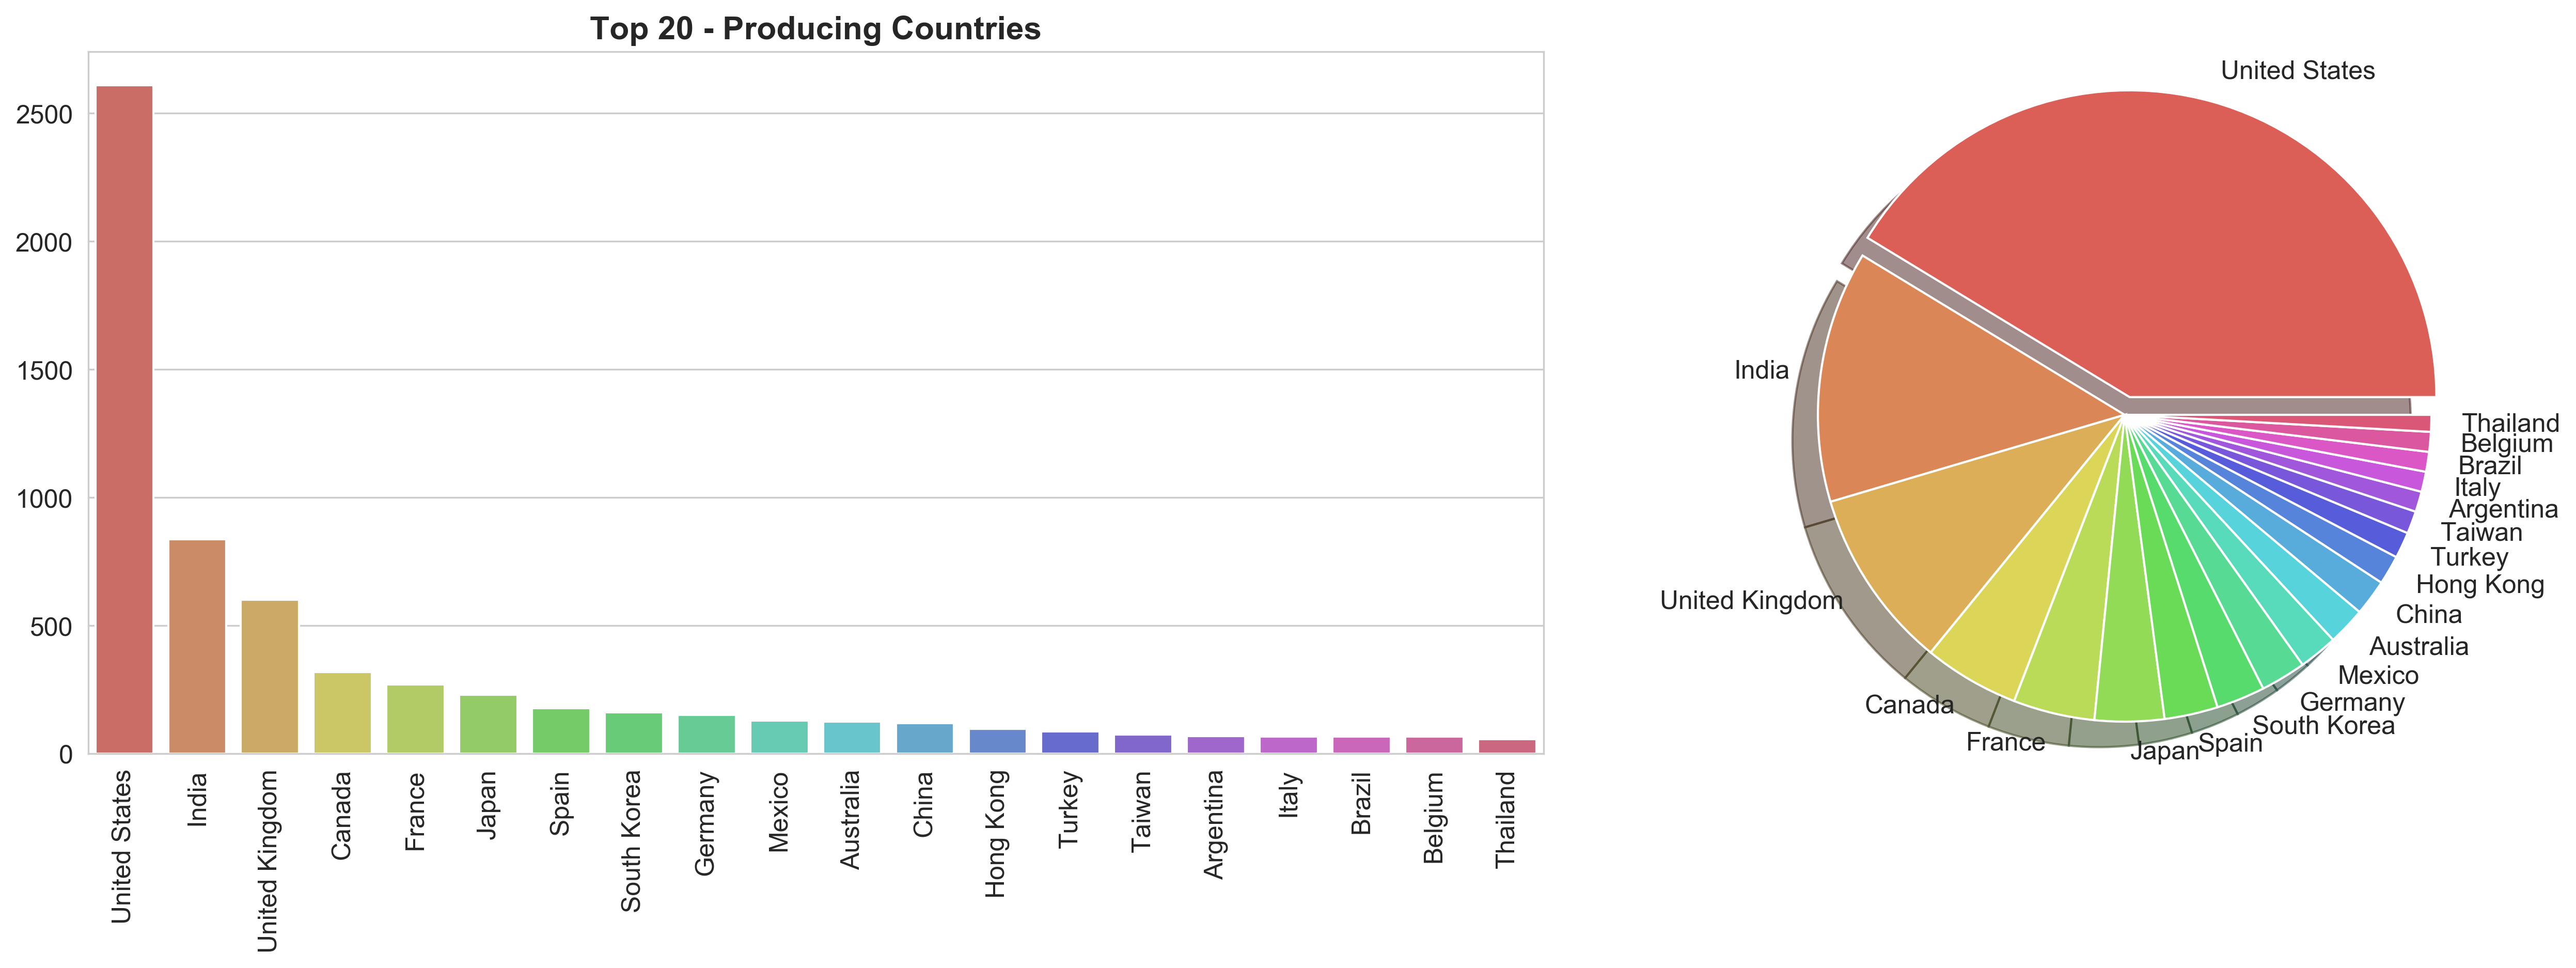

In [19]:
from matplotlib import gridspec

fig = plt.figure(figsize=(20, 6))
gs = gridspec.GridSpec(nrows=1, ncols=2,
                       height_ratios=[6], 
                       width_ratios=[10, 5])

ax = plt.subplot(gs[0])
sns.barplot(top20_country.index, top20_country, ax=ax, palette="hls")
ax.set_xticklabels(top20_country.index, rotation='90')
ax.set_title('Top 20 - Producing Countries', fontsize=15, fontweight='bold')

explode = [0 for _ in range(20)]
explode[0] = 0.06

ax2 = plt.subplot(gs[1])
ax2.pie(top20_country, labels=top20_country.index,
        shadow=True, startangle=0, explode=explode,
        colors=sns.color_palette("hls", n_colors=20)
       )
ax2.axis('equal') 

plt.show()

### TreeMap | Waffle (Mosaic plot)

Visualizing multivariate categorical data in a rigorous and informative way. 

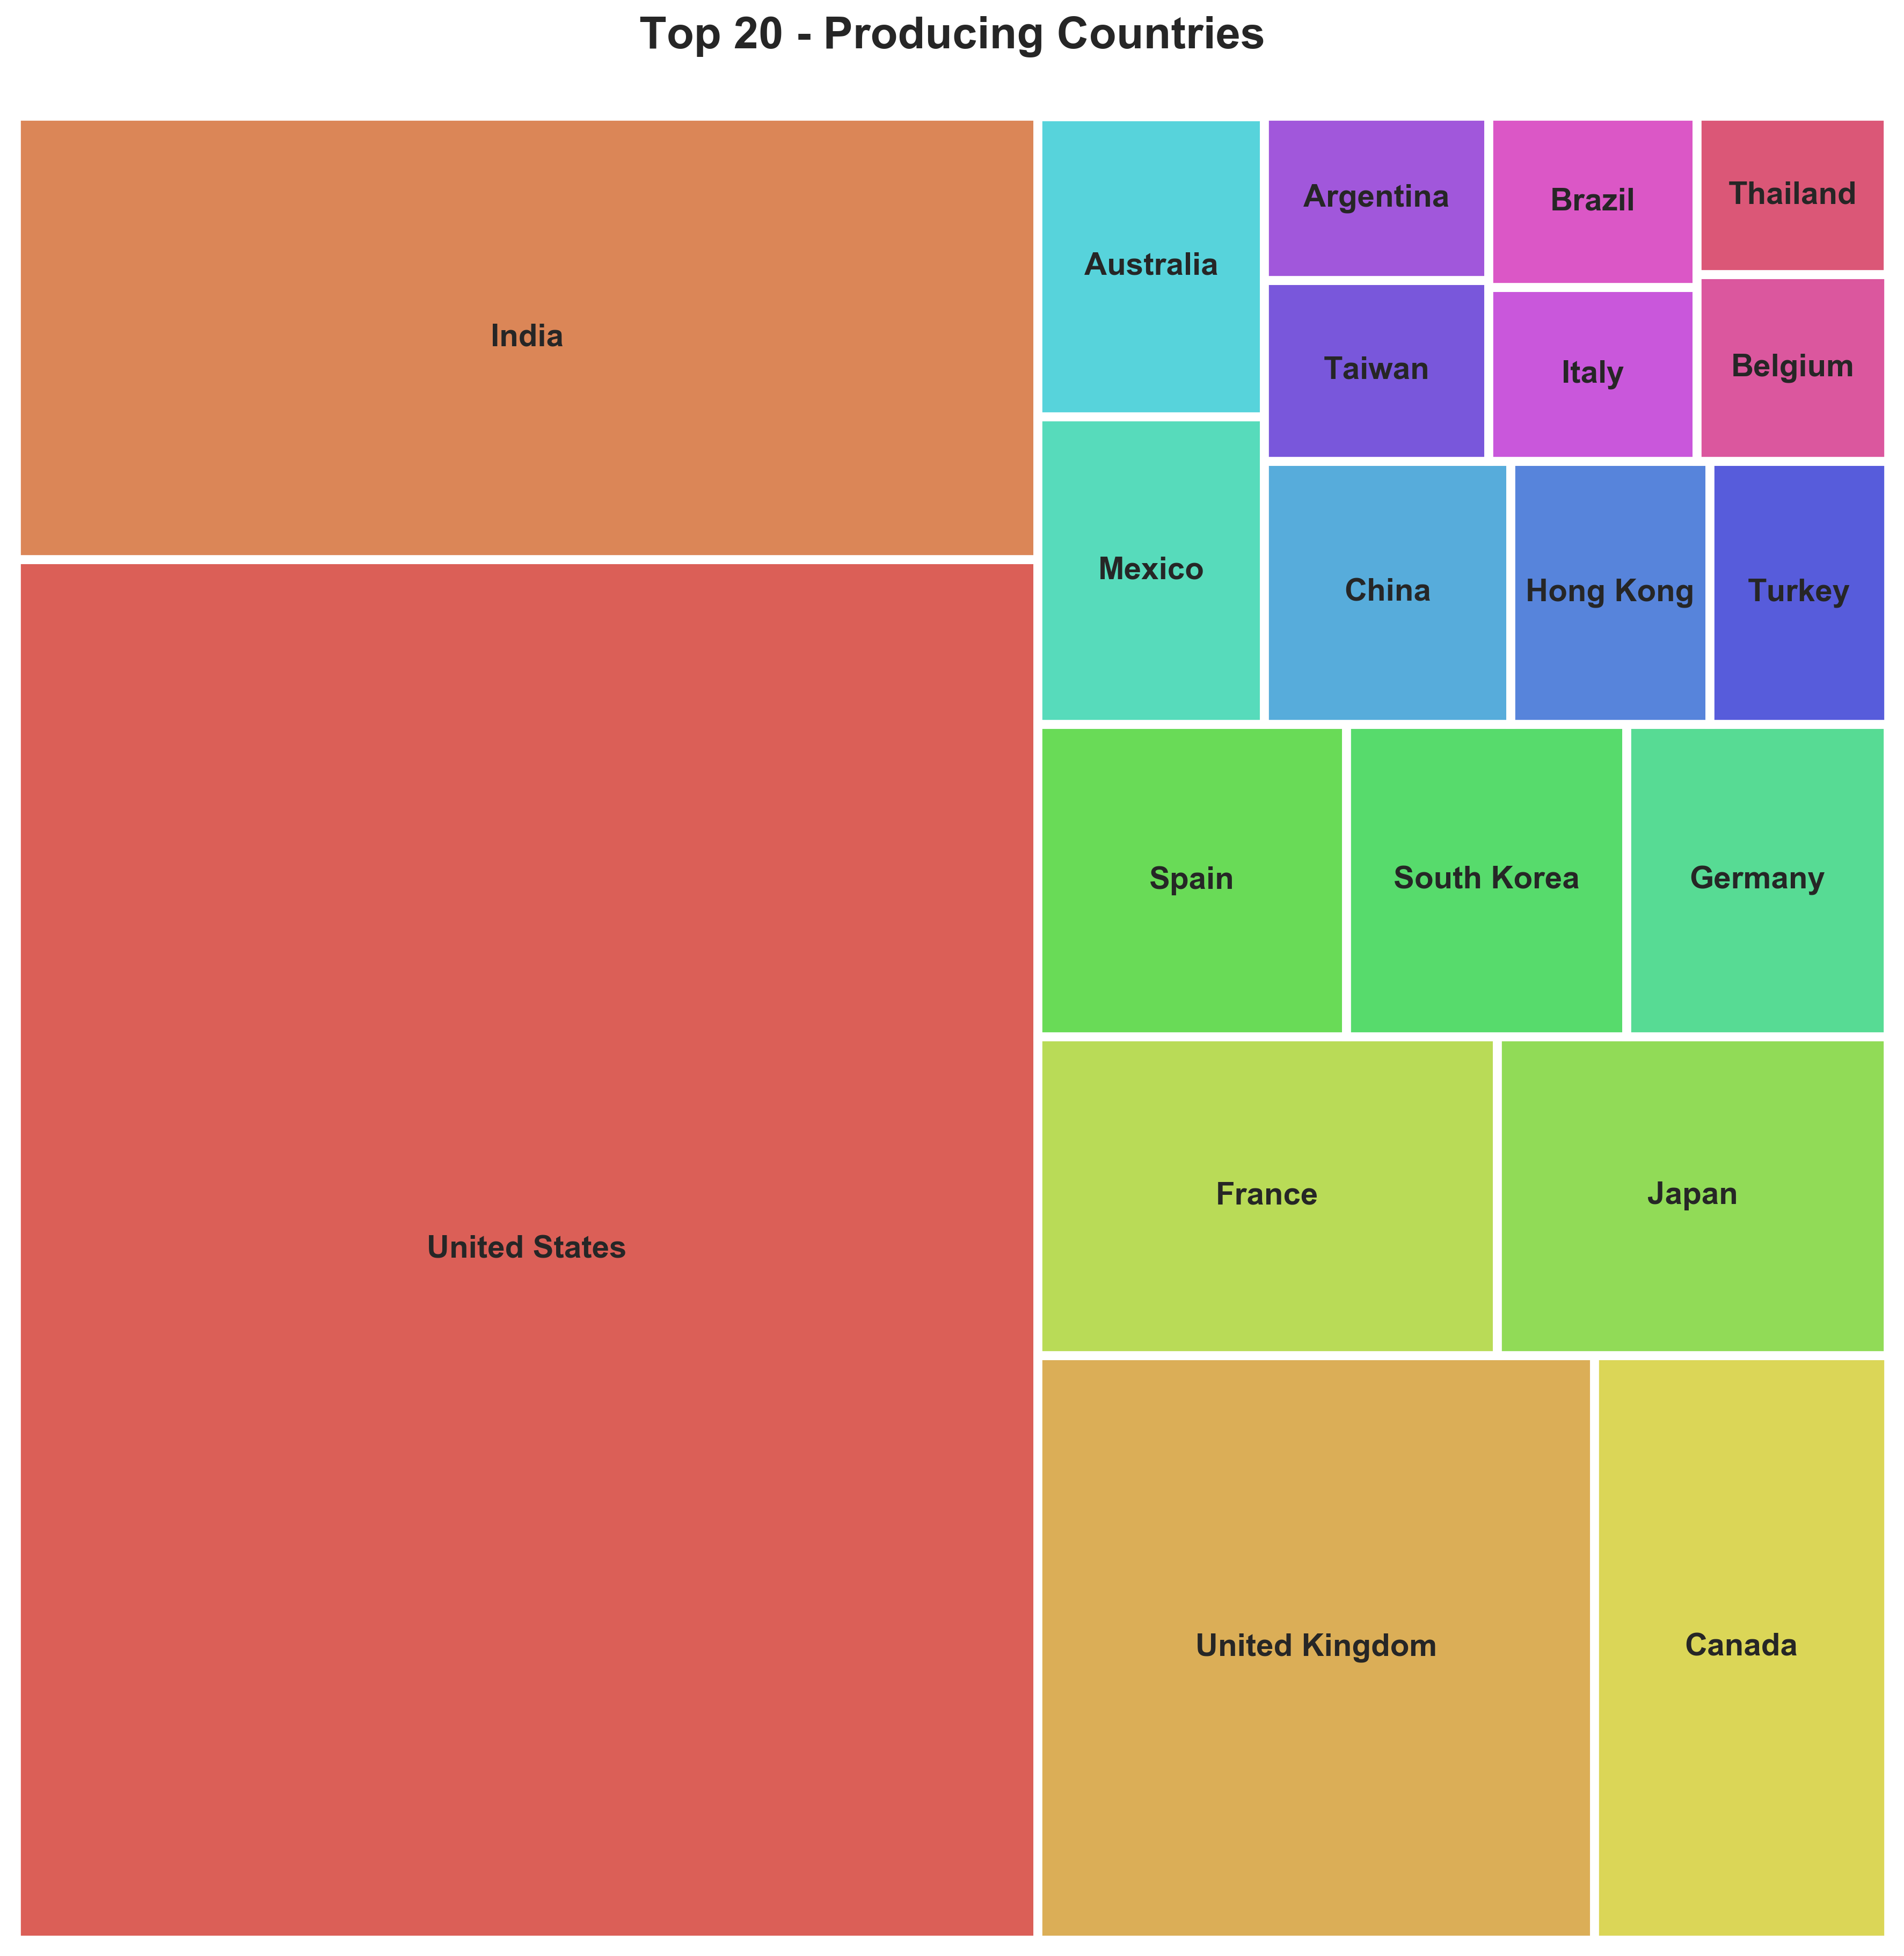

In [20]:
import squarify

y = top20_country
fig = plt.figure(figsize=(15, 15))
squarify.plot(sizes = y.values, label = y.index, color=sns.color_palette("hls", n_colors=20),
             linewidth=4, text_kwargs={'fontsize':14, 'fontweight' : 'bold'})
plt.title('Top 20 - Producing Countries', position=(0.5, 1.0+0.03), fontsize = 20, fontweight='bold')
plt.axis('off')
plt.show()

## Comparison by country for time

Consider the year by country feature.

In [21]:
import altair as alt
alt.renderers.enable('default')

RendererRegistry.enable('default')

In [22]:
netflix_titl['country'] = netflix_titl['country'].dropna().apply(lambda x : x.replace(' ,',',').replace(', ',',').split(','))
lst_col = 'country'
netflix_titl2 = pd.DataFrame({
      col :  np.repeat(netflix_titl[col].values, netflix_titl[lst_col].str.len())
      for col in netflix_titl.columns.drop(lst_col)}
    ).assign(**{lst_col:np.concatenate(netflix_titl[lst_col].values)})[netflix_titl.columns.tolist()]

## Streamgraph

It has the advantage of being able to express the overall distribution, but no specific comparison is possible.

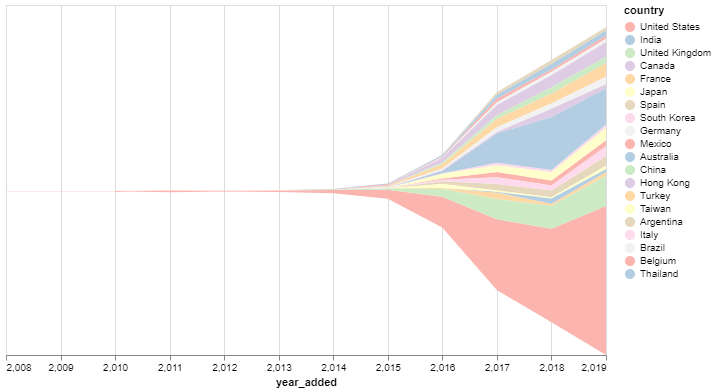

In [23]:
year_country = netflix_titl2.groupby('year_added')['country'].value_counts().reset_index(name='counts')
year_country['top20'] = year_country['country'].apply(lambda x : x in top20_country.index)

year_country = year_country[(year_country['year_added'] >= 1990) & year_country['top20'] & (year_country['year_added'] < 2020)]

alt.Chart(year_country).mark_area().encode(
    alt.X('year_added'),
    alt.Y('counts:Q', stack='center', axis=None),
    alt.Color('country:N',
        scale=alt.Scale(scheme='pastel1'),
        sort=list(top20_country.index)
    ),
).properties(
    height=350,
    width=600
)

From graph that is clearly soared between in 2015 and 2016

### Compare by percentage and visualize it as follows

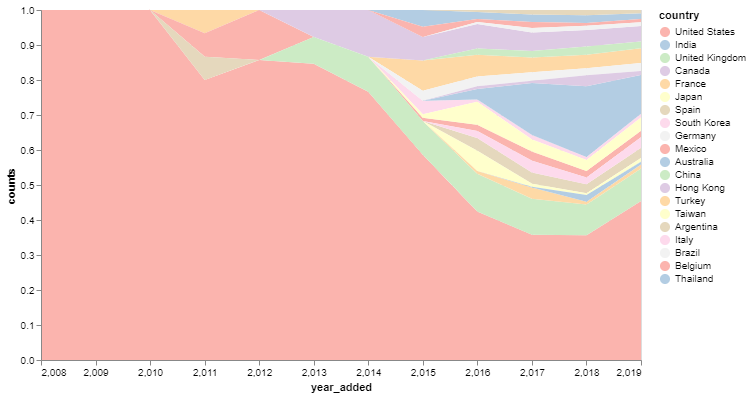

In [24]:
alt.Chart(year_country).mark_area().encode(
    alt.X('year_added'),
    alt.Y('counts:Q', stack='normalize'),
    alt.Color('country:N',
        scale=alt.Scale(scheme='pastel1'),
        sort=list(top20_country.index)      
    ),
).properties(
    height=350,
    width=600
)

The **United States, India, and the United Kingdom** have a high percentage of content.

## Movie & TV show (Genre)

The Relationship between each genre by Movie and TV Show.

In [25]:
# Similar to One-Hot Encoding
from sklearn.preprocessing import MultiLabelBinarizer 

def relation_heatmap(df, title):
    df['genre'] = df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 
    Types = []
    for i in df['genre']: Types += i
    Types = set(Types)
    print(f"There are {len(Types)} types in the Netflix {title} Dataset")    
    test = df['genre']
    mlb = MultiLabelBinarizer()
    res = pd.DataFrame(mlb.fit_transform(test), columns=mlb.classes_, index=test.index)
    corr = res.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize=(15, 14))
    pl = sns.heatmap(corr, mask=mask, cmap= "inferno", vmax=.5, vmin=-.5, center=0, square=True, linewidths=.7, cbar_kws={"shrink": 0.6})
    
    plt.show()

### Movie Genre Relation

There are 20 types in the Netflix Movie Dataset


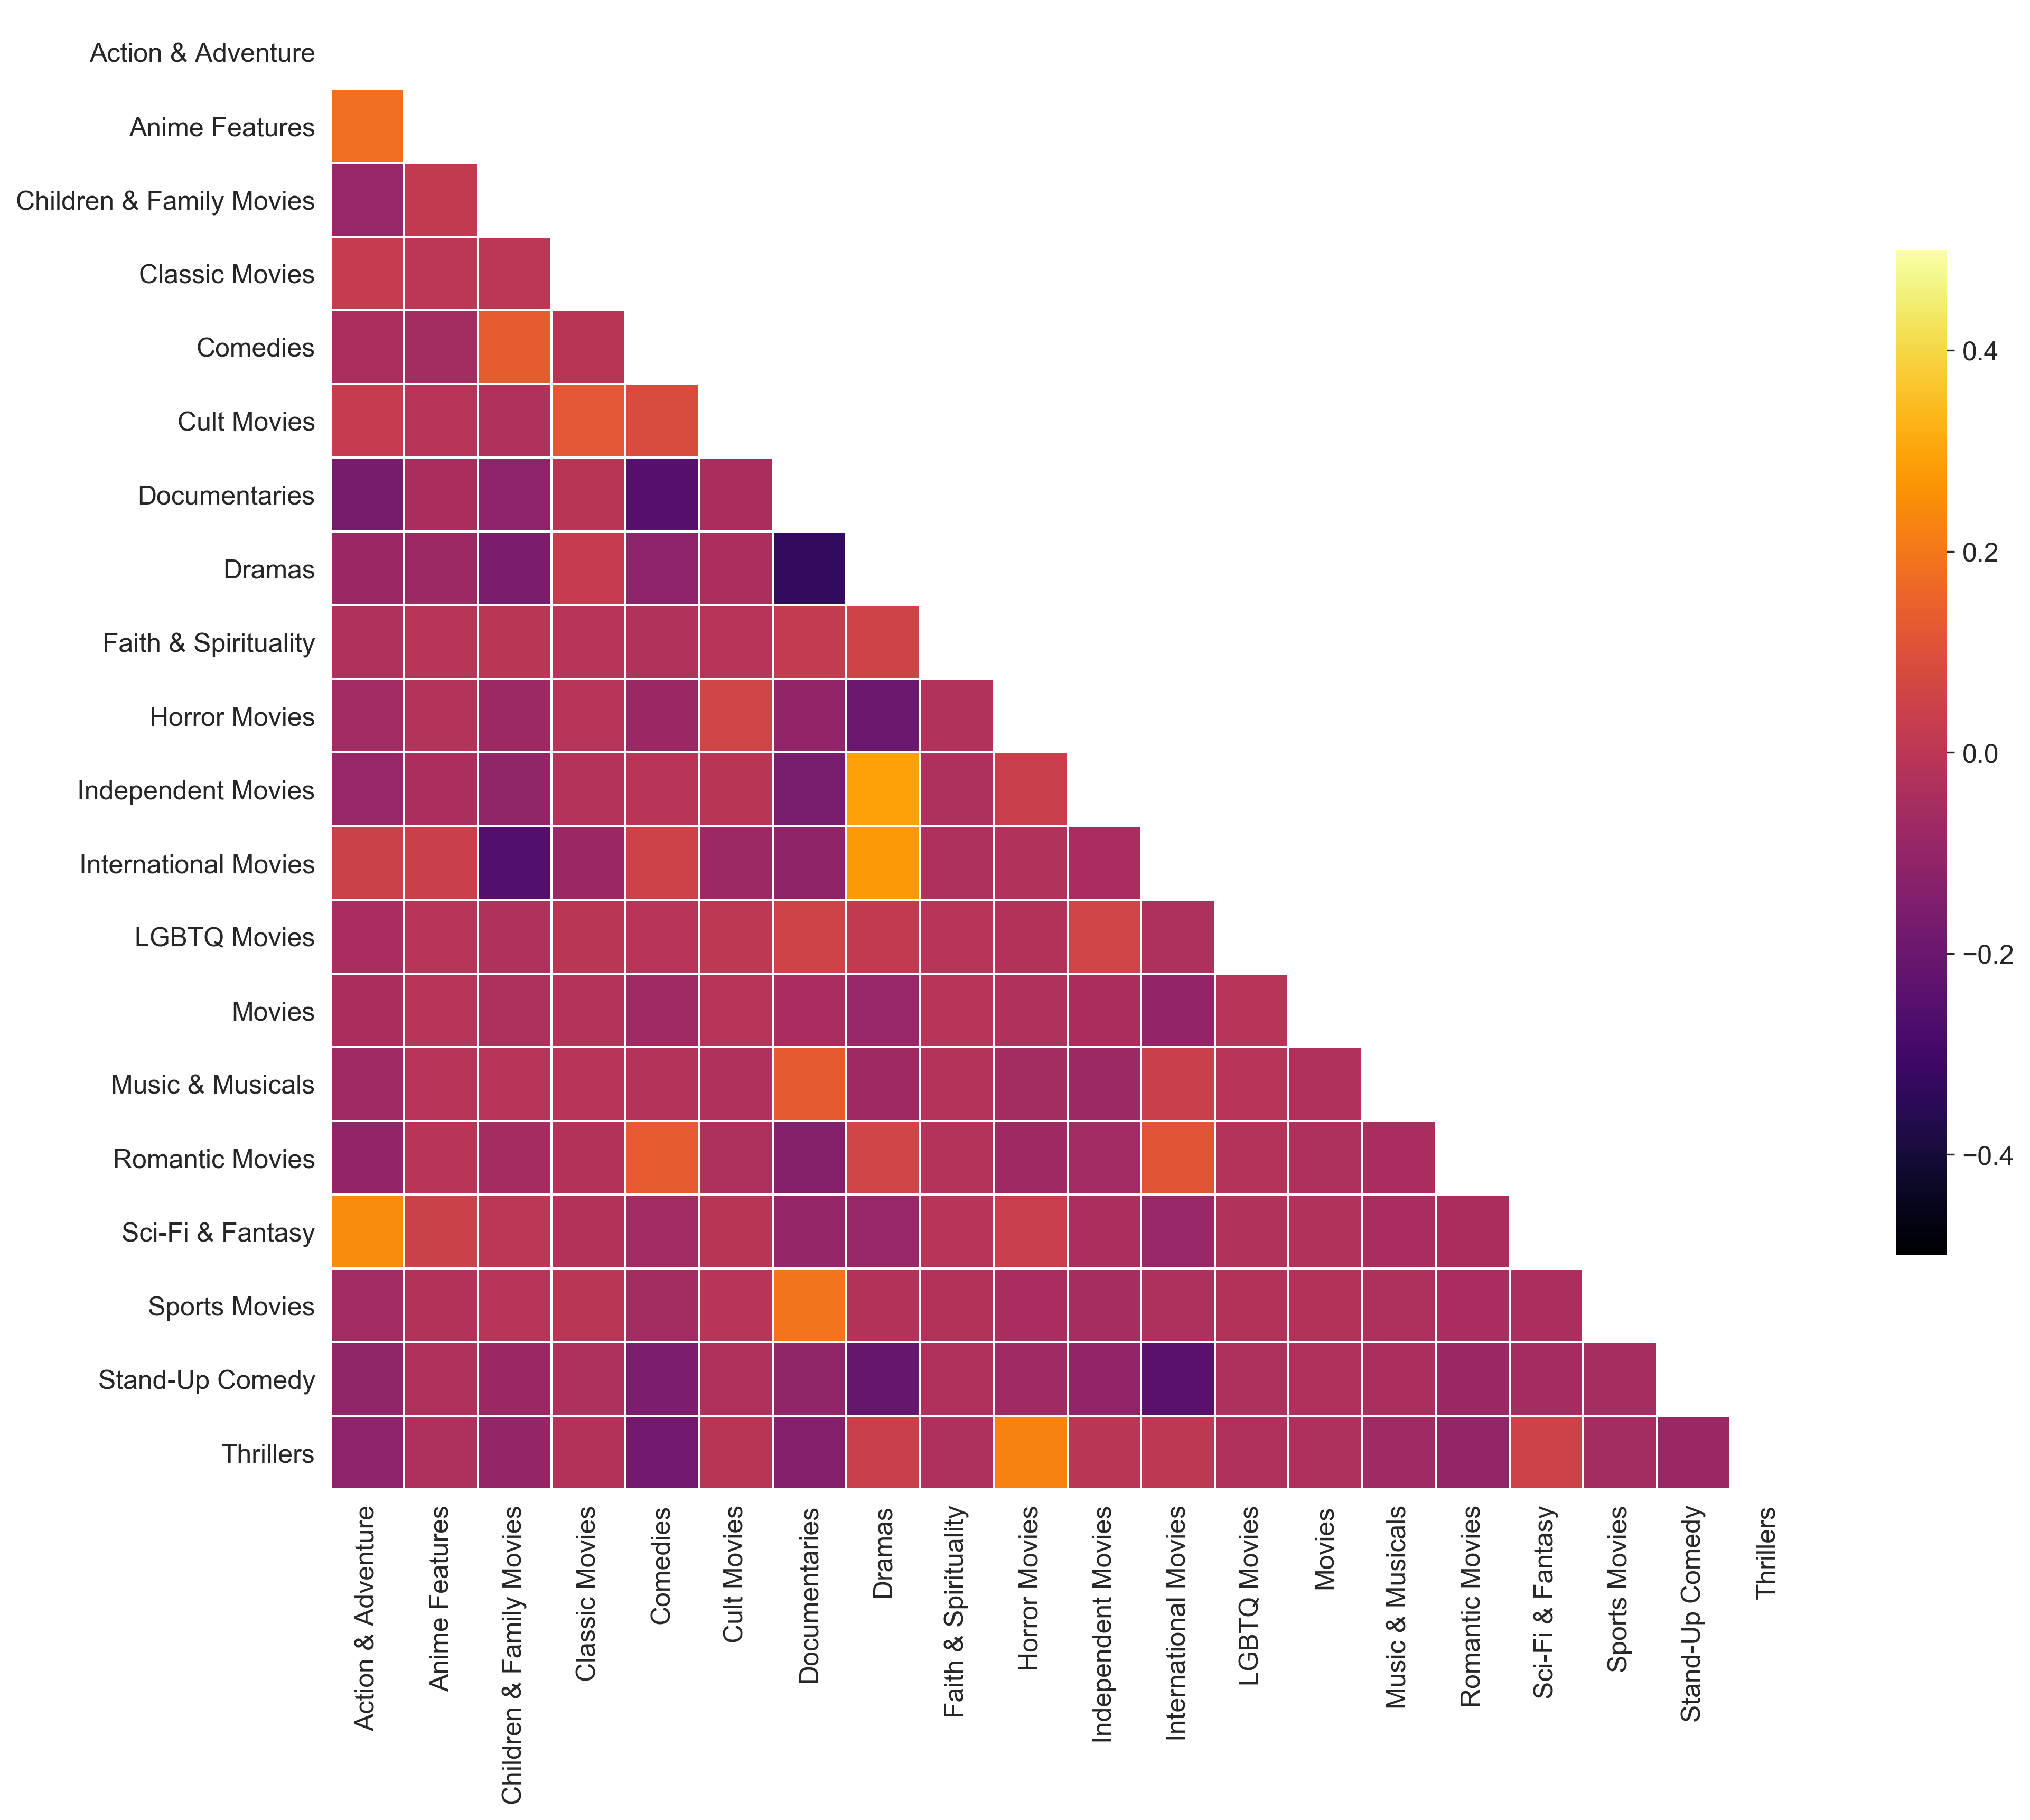

In [26]:
relation_heatmap(Movie, 'Movie')

Bright colors indicate a positive relationship. For Movie, the negative relationship between **Drama and Documentary** is remarkable. 

### TV Show Genre Relation

There are 22 types in the Netflix TV Show Dataset


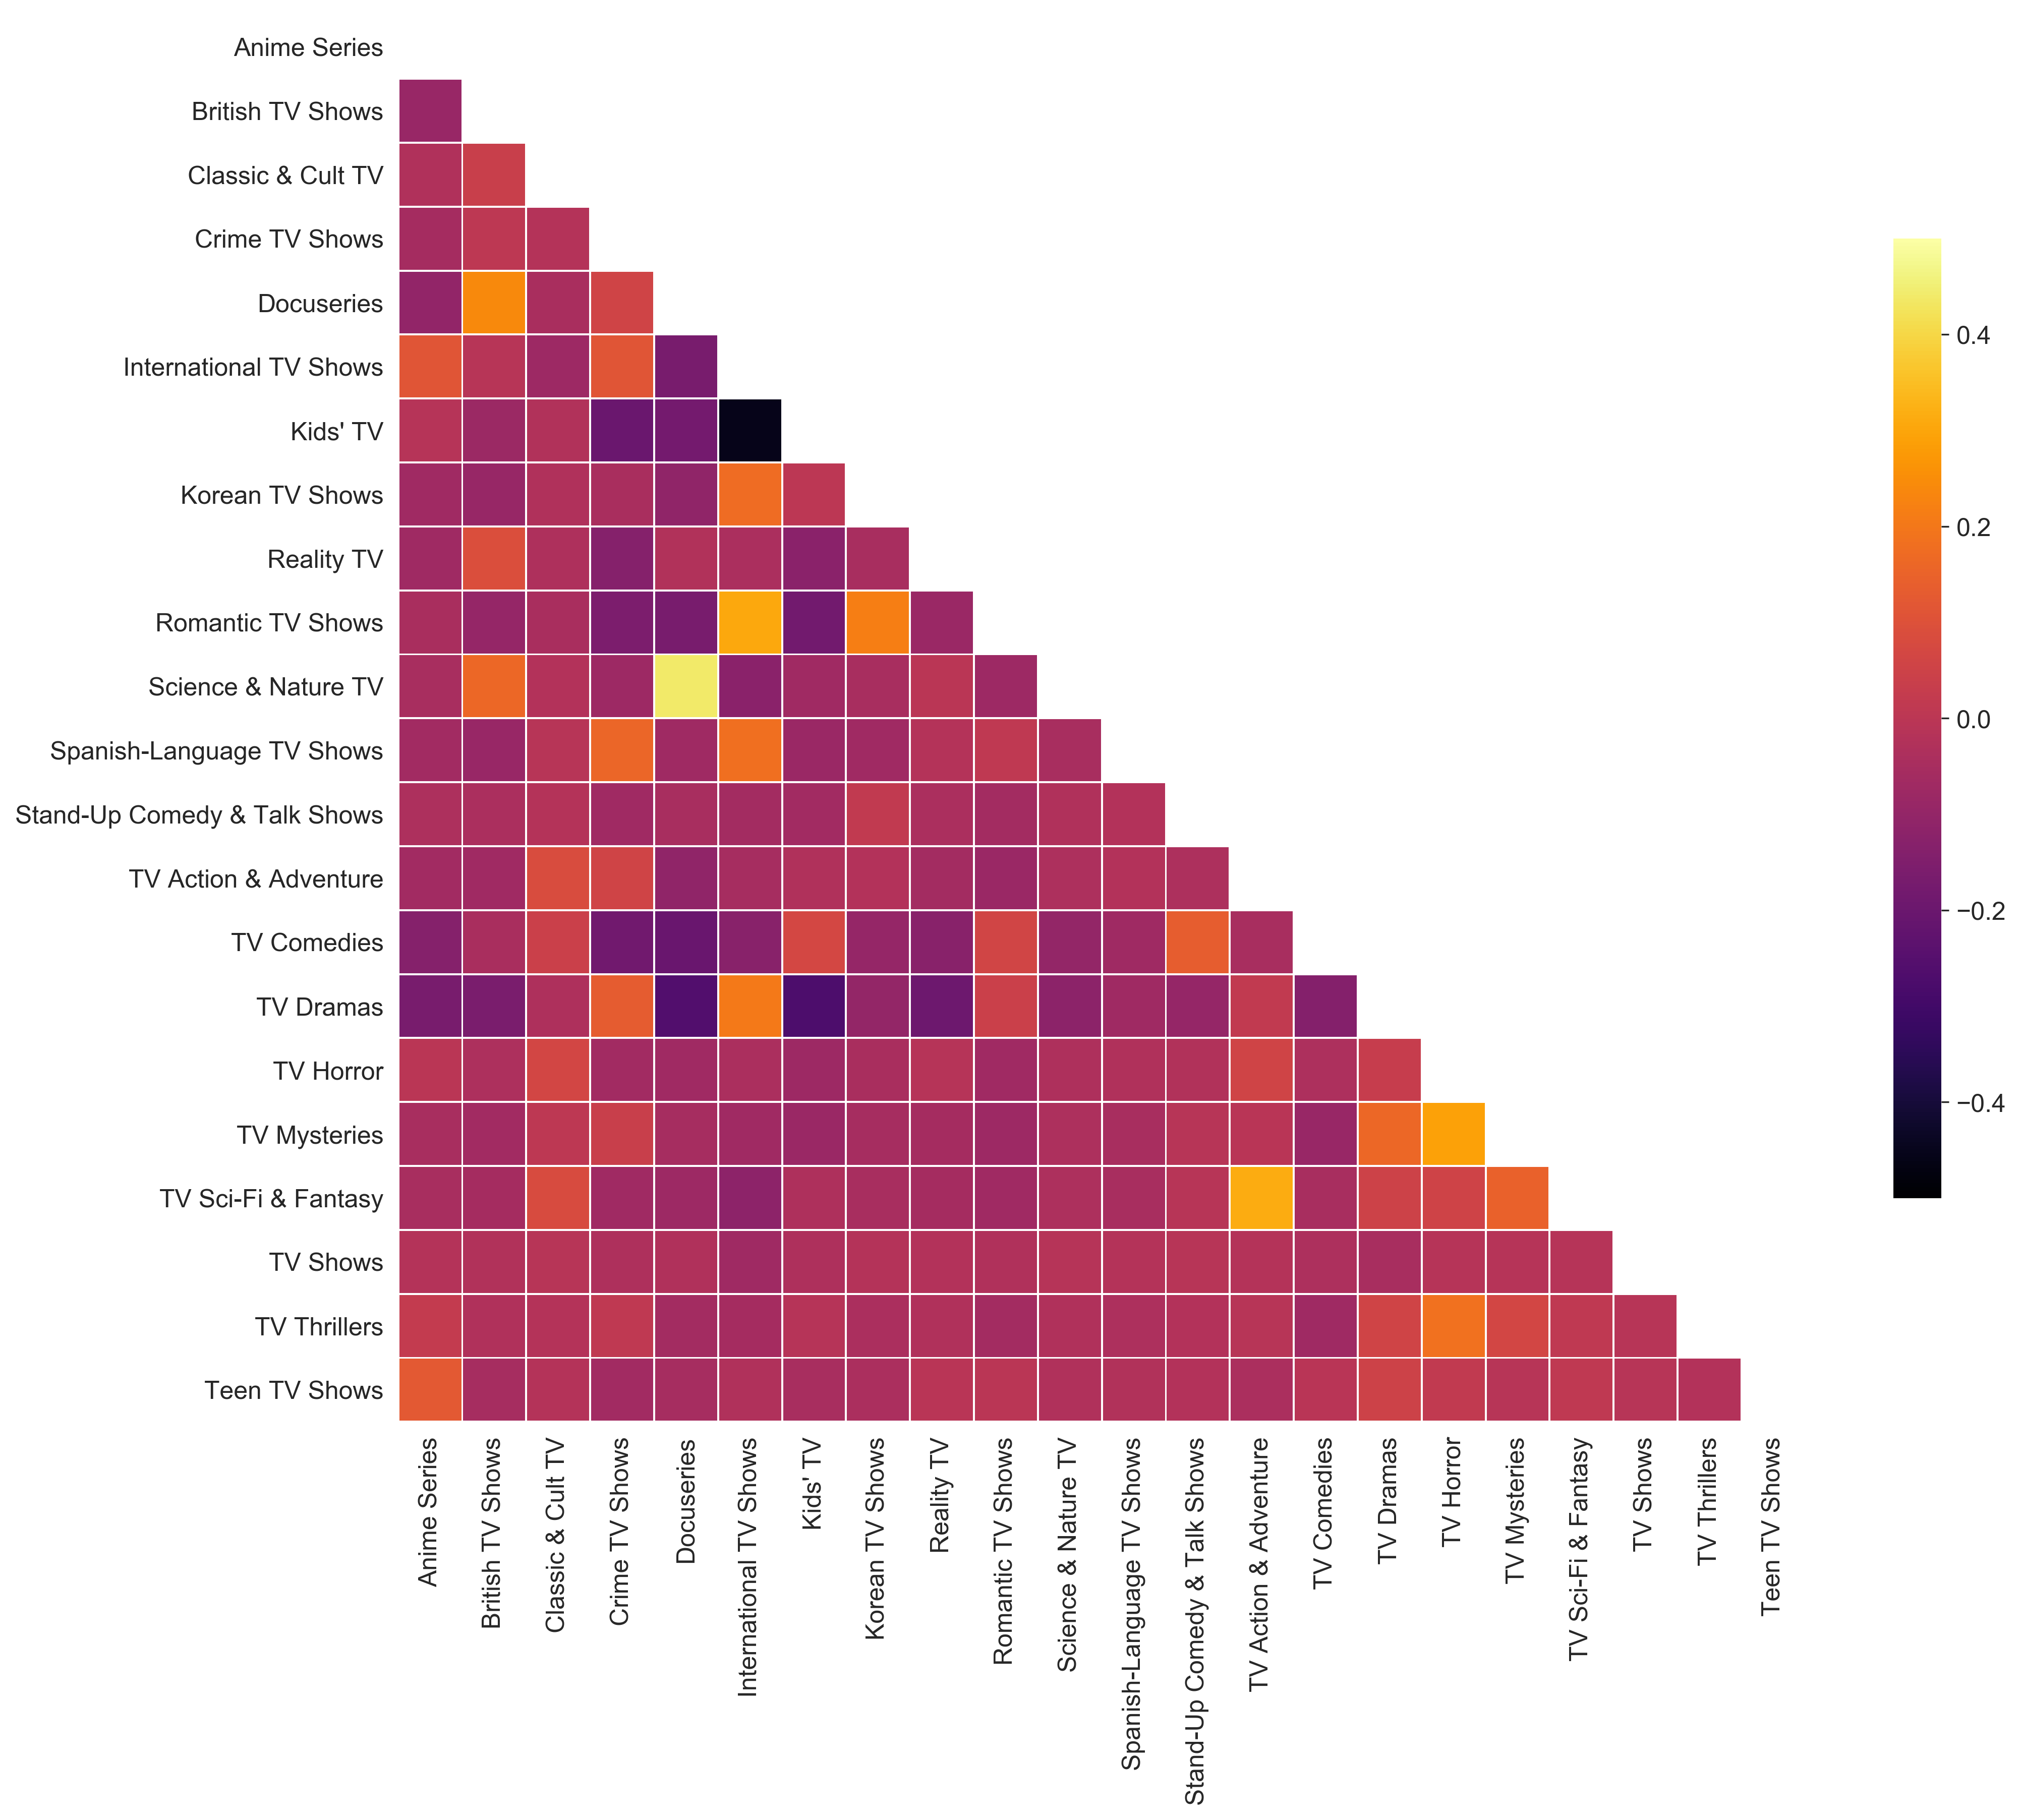

In [27]:
relation_heatmap(TV_Show, 'TV Show')

Darker colors indicate a negative relationship. The relationship between **Kids' TV and International TV Shows** and **Science & Natural and Docuseries** is the most obvisious

## Rating Distribution

### Netflix Rating System
- Source (https://help.netflix.com/en/node/2064/us)


|Little Kids | Older Kids | Teens | Mature|
|-|-|-|-|
|G, TV-Y, TV-G | PG, TV-Y7, TV-Y7-FV, TV-PG | PG-13, TV-14 | R, NC-17, TV-MA|

### Rating System

>  [Motion Picture Association of America film rating system](https://en.wikipedia.org/wiki/Motion_Picture_Association_of_America_film_rating_system)

|Rating|Meaning|
|-|-|
|G|General Audiences|
|PG|Parental Guidance Suggested|
|PG-13|Parents Stongly Cautioned|
|R|Restricted|
|NC-17|Adults Only|

In [28]:
rating_order =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']

movie_rating = Movie['rating'].value_counts()[rating_order]
tv_rating = TV_Show['rating'].value_counts()[rating_order].fillna(0)

In [29]:
def rating_barplot(data, title, height, h_lim=None):
    fig, ax = plt.subplots(1,1, figsize=(20, 10))
    if h_lim :
        ax.set_ylim(0, h_lim)
    ax.bar(data.index, data,  color="#d0d0d0", width=0.6, edgecolor='black')

    color =  ['orange',  'red',  'green',  'blue']
    span_range = [[0, 2], [3,  6], [7, 8], [9, 11]]

    for idx, sub_title in enumerate(['Little Kids', 'Older Kids', 'Teens', 'Mature']):
        ax.annotate(sub_title,
                    xy=(sum(span_range[idx])/2 ,height),
                    xytext=(0,0), textcoords='offset points',
                    va="center", ha="center",
                    color="w", fontsize=16, fontweight='bold',
                    bbox=dict(boxstyle='round4', pad=0.4, color=color[idx], alpha=0.6))
        ax.axvspan(span_range[idx][0]-0.4,span_range[idx][1]+0.4,  color=color[idx], alpha=0.1)

    ax.set_title(f'Distribution of {title} Rating', fontsize=20, fontweight='bold', position=(0.5, 1.0+0.03))
    plt.show()

### Movie Rating

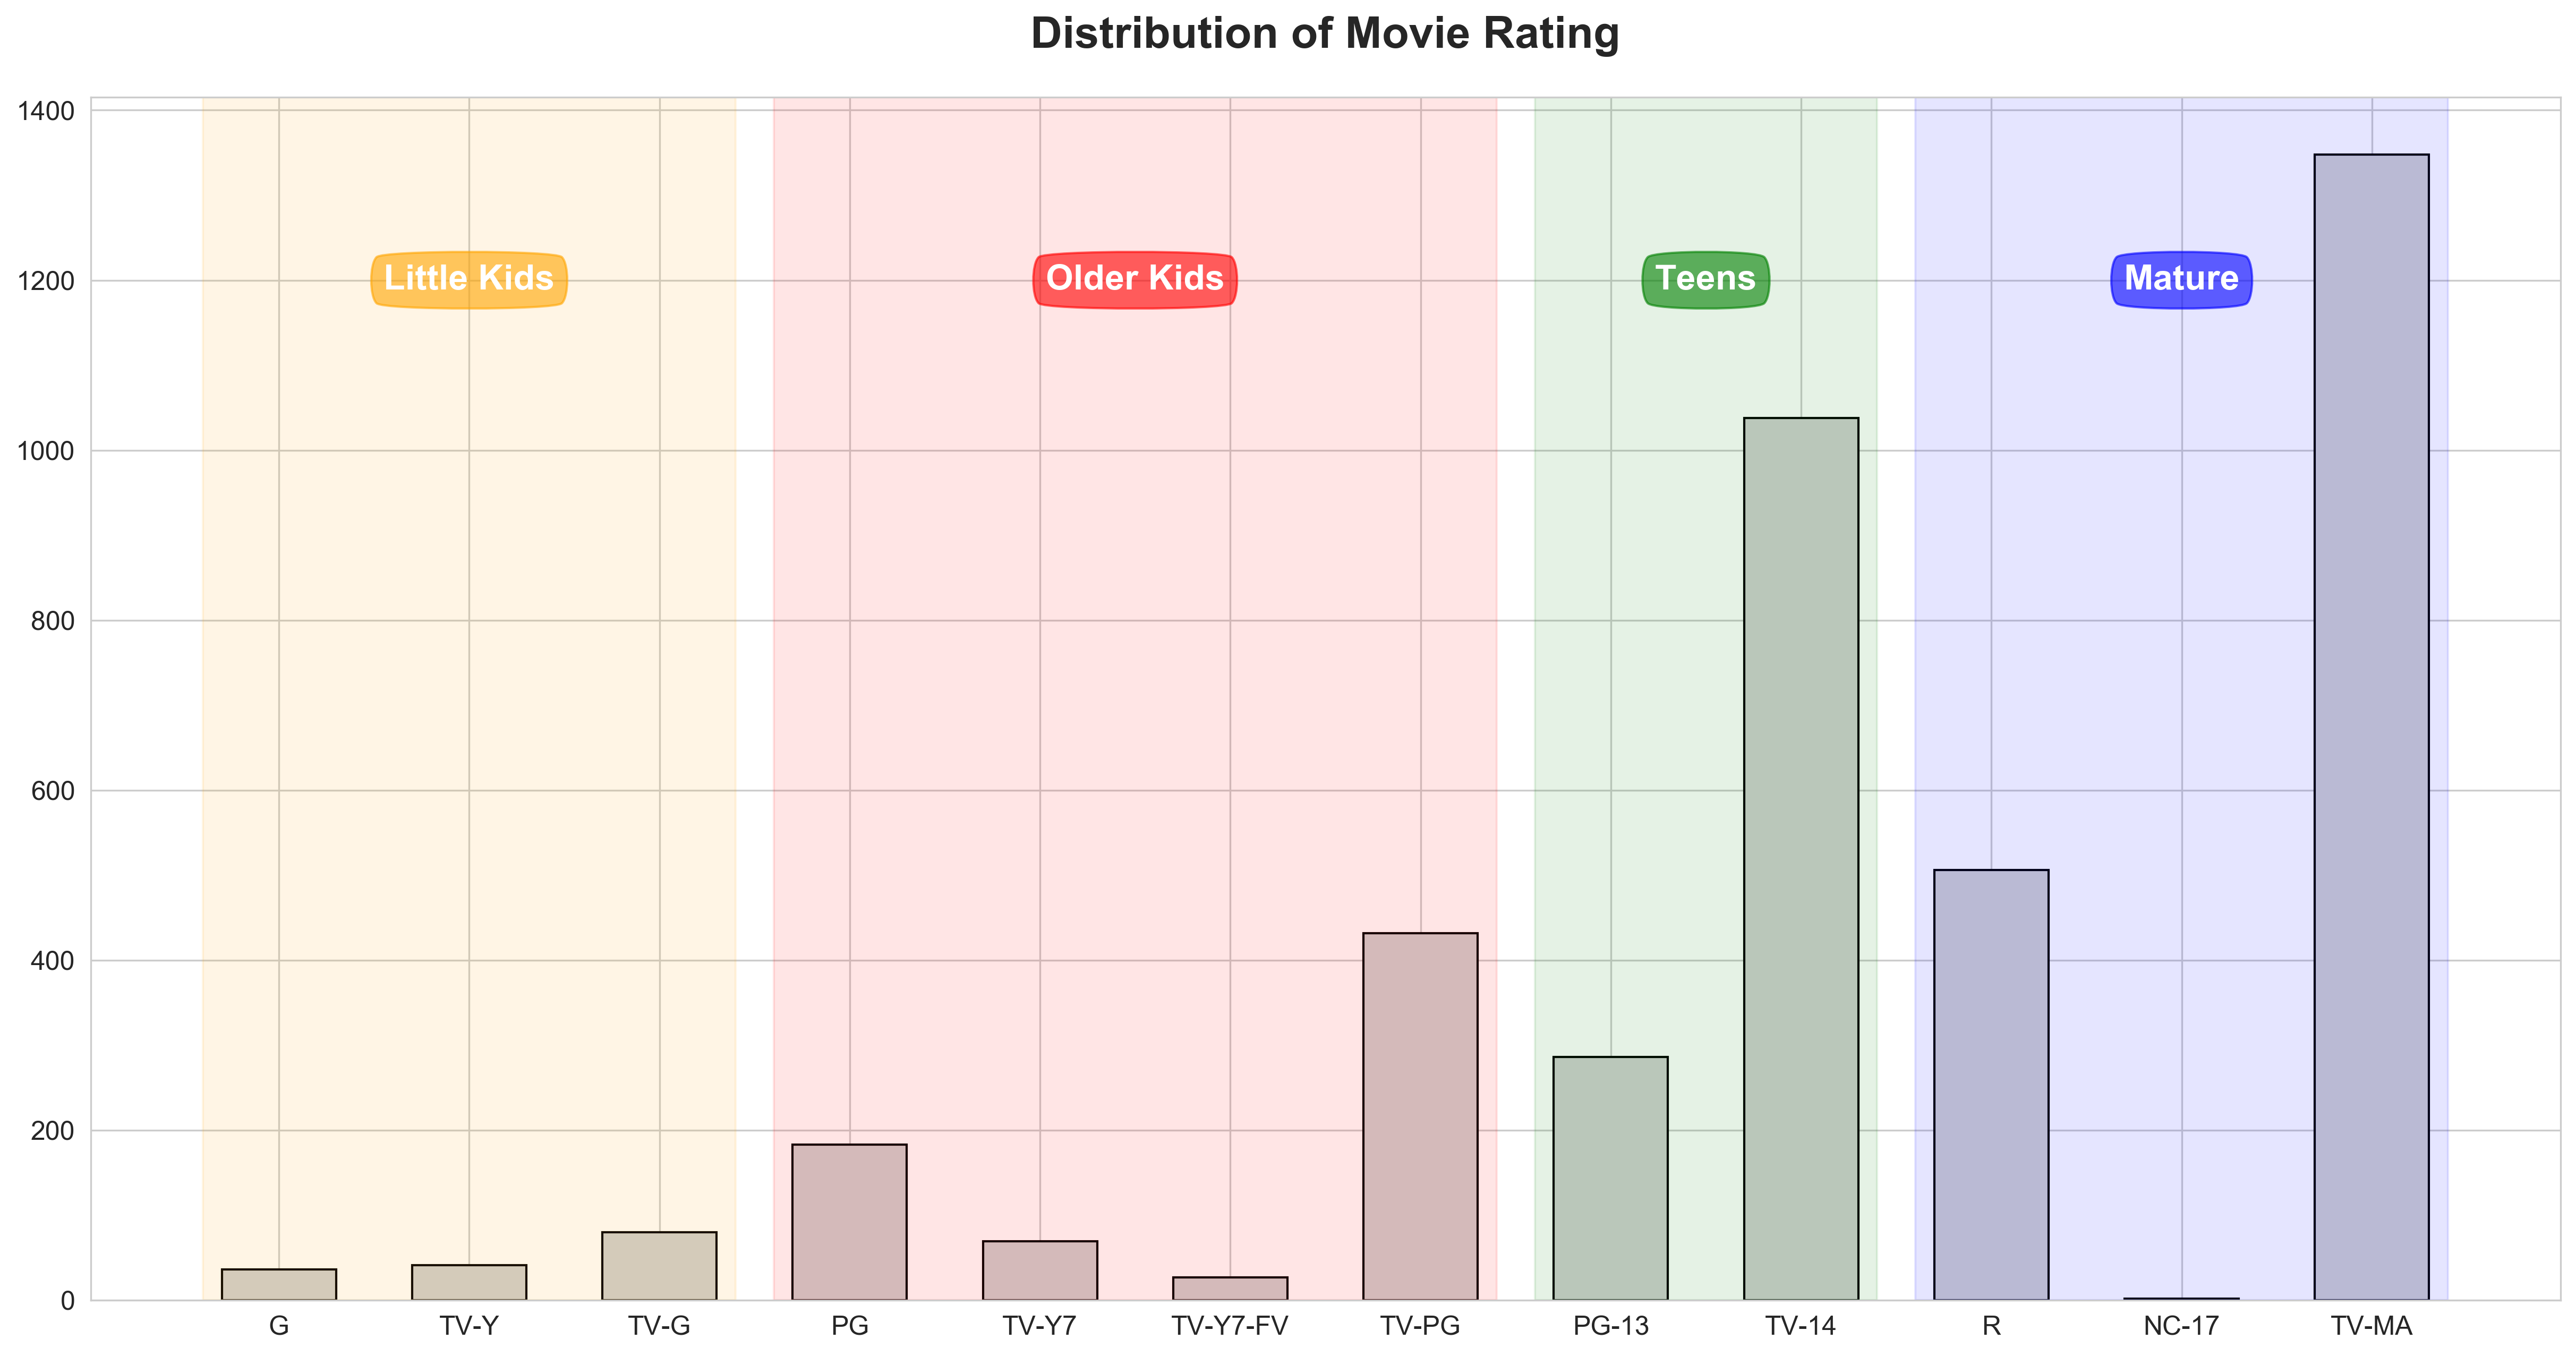

In [30]:
rating_barplot(movie_rating,'Movie', 1200)

### TV Show Rating

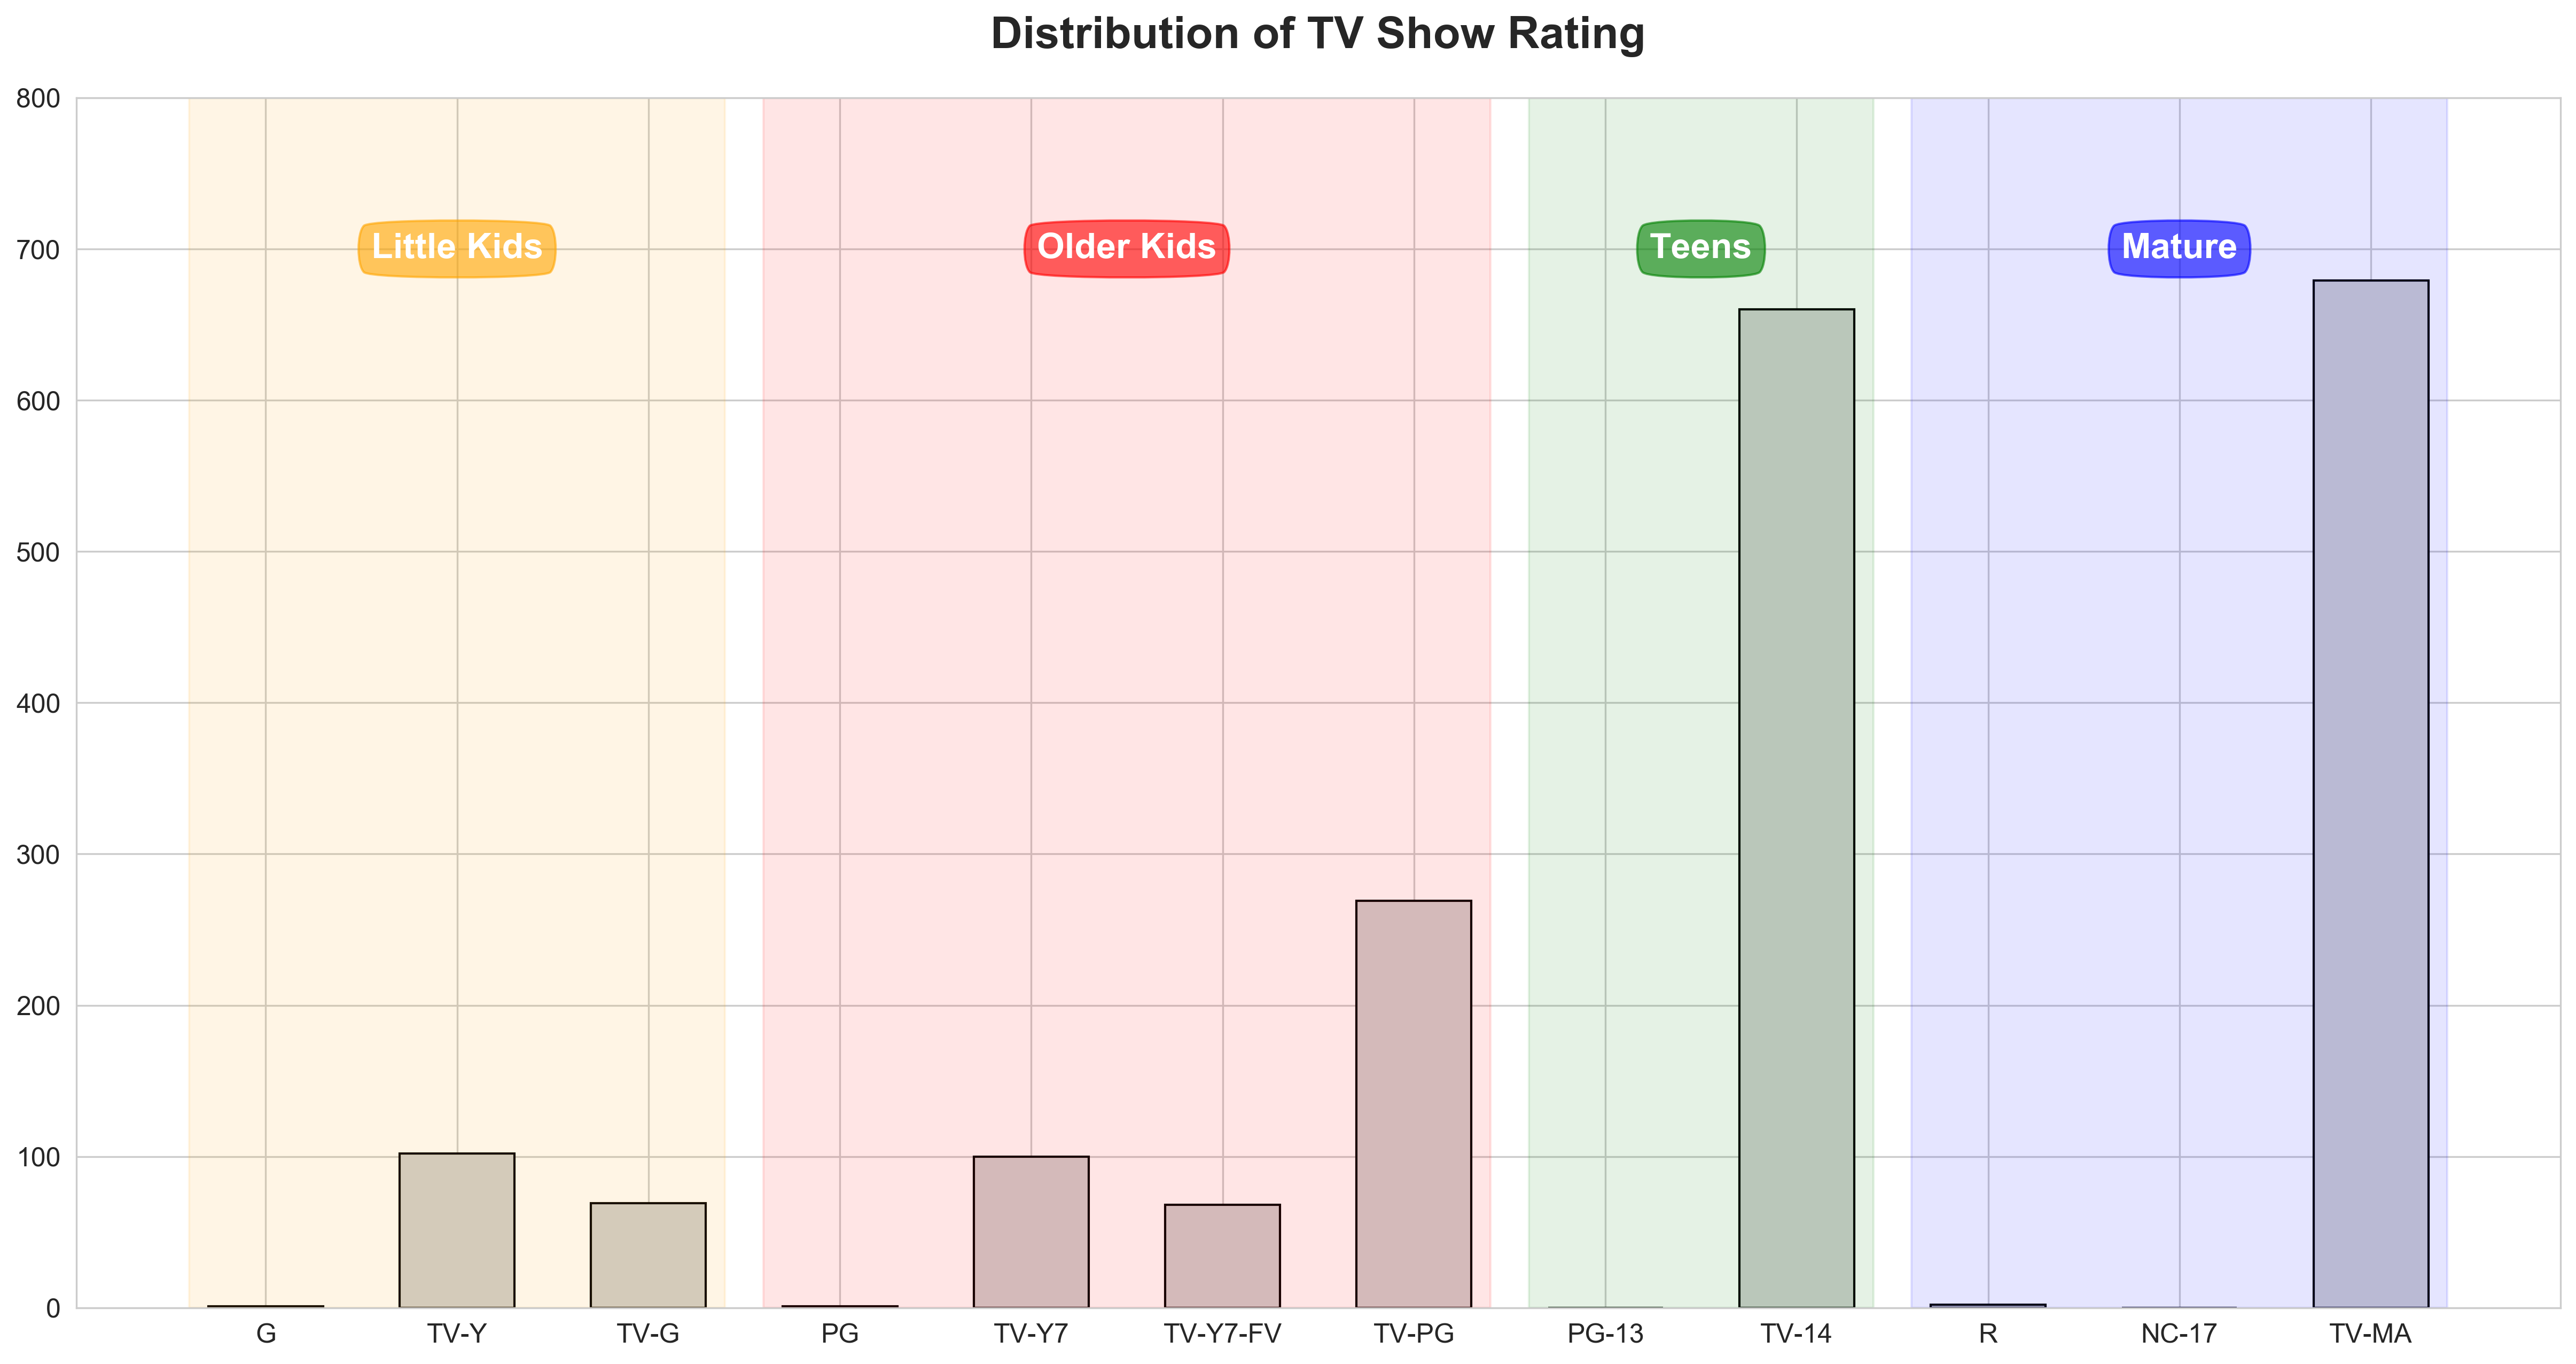

In [31]:
rating_barplot(tv_rating,'TV Show' , 700, 800)

### Ratio on a similar scale

In [32]:
rating_netflix = netflix_titl[['rating', 'type']].groupby('type')['rating'].value_counts().unstack().fillna(0)[rating_order].T
rating_netflix = pd.DataFrame(pd.concat([rating_netflix['Movie'], rating_netflix['TV Show']])).reset_index().rename(columns={'rating':'rating',0:'cnt'})
rating_netflix['type'] = rating_netflix.index//12

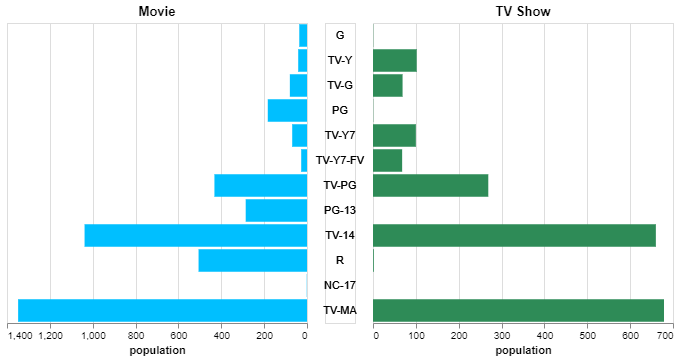

In [33]:
netflix_titl['tmp'] = 1
base = alt.Chart(rating_netflix).transform_calculate(
    type=alt.expr.if_(alt.datum.type == 0, 'Movie', 'TV Show')
).properties(
    height=300,
    width=300
)

color_scale = alt.Scale(domain=['Movie', 'TV Show'], range=['deepskyblue', 'seagreen'])

left = base.transform_filter(
    alt.datum.type == 'Movie'
).encode(
    y=alt.Y('rating:O', axis=None, sort=rating_order),
    x=alt.X('cnt:Q',
            title='population',
            sort=alt.SortOrder('descending')),
    color=alt.Color('type:N', scale=color_scale, legend=None)
).mark_bar().properties(title='Movie')

middle = base.encode(
    y=alt.Y('rating', axis=None, sort=rating_order),
    text=alt.Text('rating'),
).mark_text().properties(width=30)

right = base.transform_filter(
    alt.datum.type == 'TV Show'
).encode(
    y=alt.Y('rating:O', axis=None, sort=rating_order),
    x=alt.X('cnt:Q', title='population'),
    color=alt.Color('type:N', scale=color_scale, legend=None)
).mark_bar().properties(title='TV Show')

alt.concat(left, middle, right, spacing=5)

## Relationship Improvement per Month

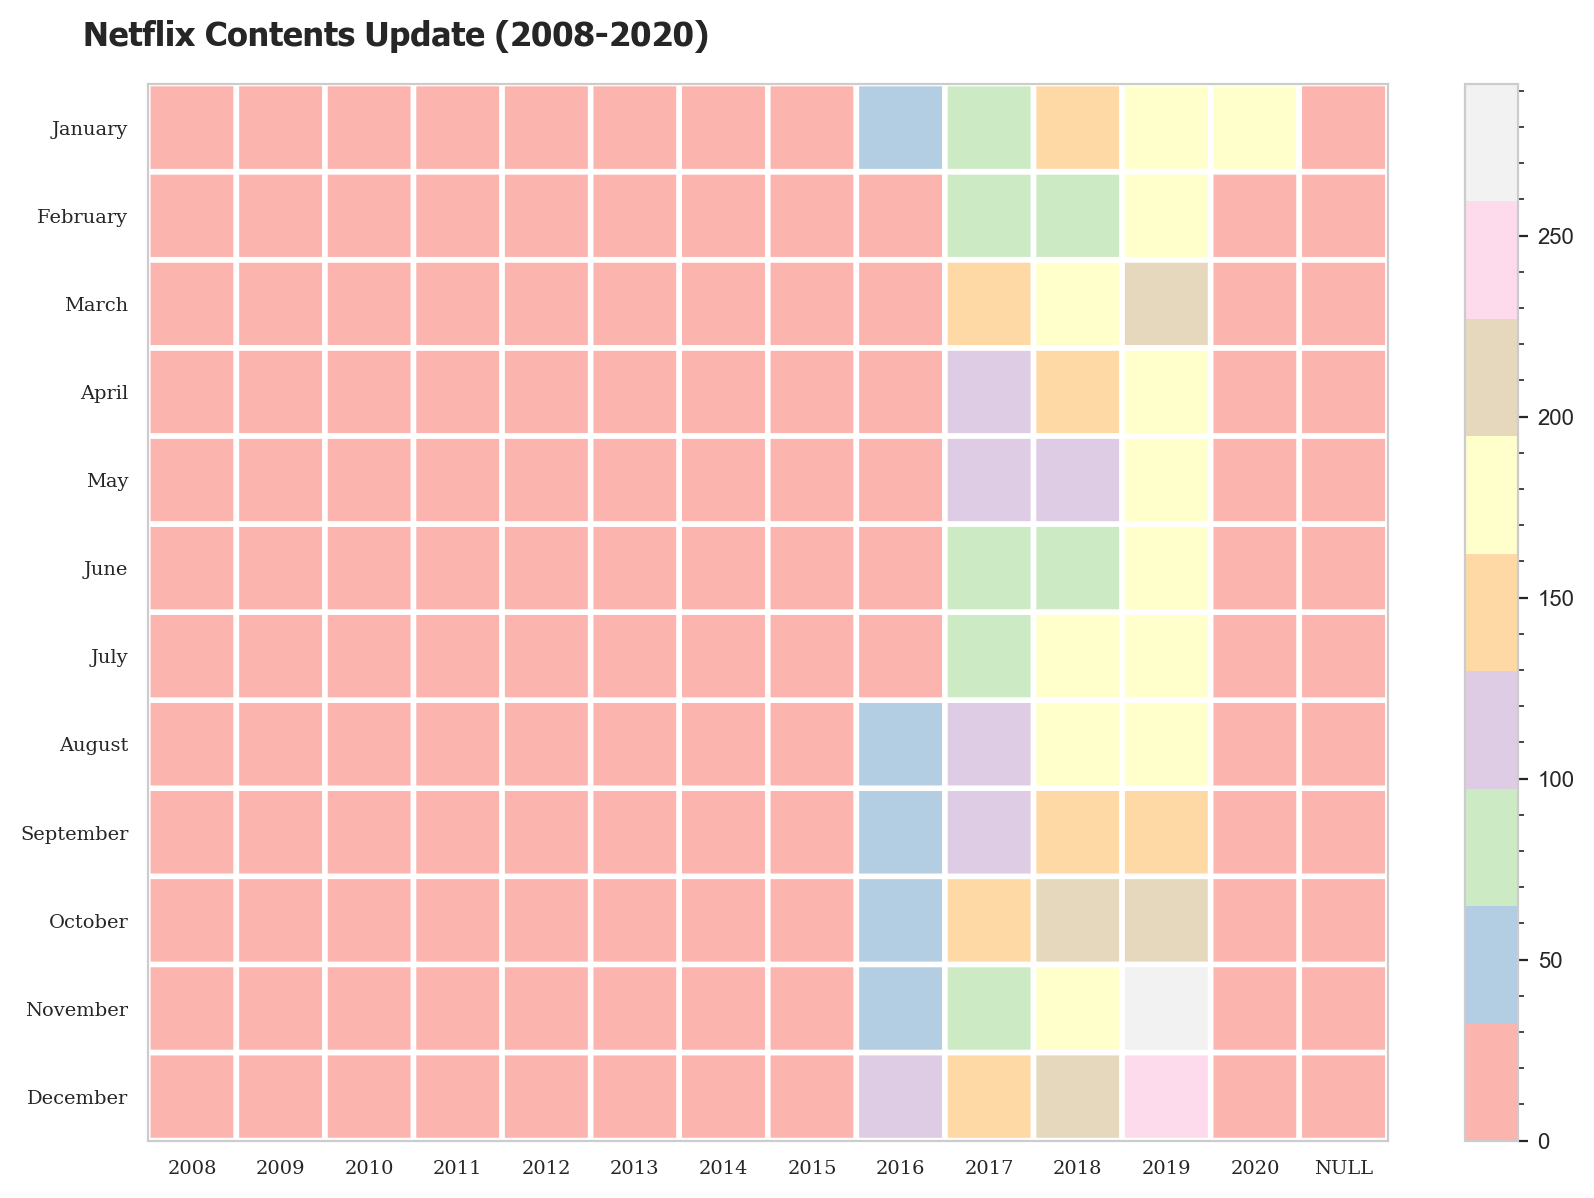

In [34]:
netflix_date = netflix_titl[['date_added']].dropna()
netflix_date['year'] = netflix_date['date_added'].apply(lambda x : x.split(', ')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
plt.figure(figsize=(10, 7), dpi=200)
plt.pcolor(df, cmap='Pastel1', edgecolors='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(df.index), 1), df.index, fontsize=7, fontfamily='serif')

plt.title('Netflix Contents Update (2008-2020)', fontsize=12, fontfamily='Tahoma', fontweight='bold', position=(0.2, 1.0+0.02))
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()
plt.show()